# Perkenalan
- - - 
1. Latar belakang memilih kasus
2. Data yang digunakan (jumlah data, kelas, sumber)
3. *Objective* yang ingin dicapai
4. *Authors* dan *Creators*

Latar belakang memilih kasus
- - -
Menurut kami permasalahan hujan di Australia sangat menarik untuk dipecahkan. Dikarenakan berdasarkan [web](https://www.australia.com/id-id/facts-and-planning/weather-in-australia.html) iklim Australia yang memiliki variasi di setiap bagian negara bagian dan wilayahnya, serta musim di Australia berkebalikan dengan musim-musim di belahan dunia utara. Tujuan projek ini dibuat yakni memprediksi apakah besok terjadi hujan.

Data yang digunakan 
- - -
Data ini bernama Rain in Australia yang diperoleh dari link berikut [di sini (data Rain in Australia)](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia. 

*Objective* yang ingin dicapai
- - -
Model prediksi hujan yang dibangun tentunya dapat memberikan hasil akurasi yang maksimal. Selain itu, model prediksi hujan yang dibangun berusaha untuk meminimumkan FN, sehingga model sebisa mungkin memberikan **recall maksimum**

*Authors* dan *Creators*
- - -
1. Joesoef Septadi Wijaya
2. Ima Nur Firda Alma'ida
3. Intan Amelia

# Import & Install Libraries

In [ ]:
# Data Loading
import pandas as pd
import numpy as np
from scipy import stats

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder #ordinal encoding untuk atribut kategorikal
from sklearn.preprocessing import MinMaxScaler,StandardScaler #scaler for normalization 
from sklearn.preprocessing import OneHotEncoder #one hot encoding nominal atribut

# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

# Chi-Square and Mutual Information feature selection for numeric input and categorical output
from sklearn.feature_selection import mutual_info_classif


# Splitting dataset and kfold
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV

# Dimensionality reduction
from sklearn.decomposition import PCA

# Modelling
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Model performance
from sklearn import metrics
from sklearn.metrics import classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Other (save models)
import pickle

# Data Loading
- - -
Data ini nantinya akan dibagi ke dalam dua bagian:
1. Data *Training* 70%
2. Data *Testing* 30%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Menampilkan isi data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DatasetH8/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Terlihat cukup banyak data yang mengandung **NaN**, sehingga penanganan *missing value* menjadi penting

### Mengetahui dimensi data

In [ ]:
attributes = df.columns.values
attributes

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

### Melihat tipe data setiap kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari hasil ini terlihat bahwa ada nilai *missing values* yang banyak pada beberapa atribut, seperti **Evaporation, Sunshine, Cloud9am, Cloud3pm**. Selain itu, ada beberapa tipe data yang beragam dari data yang diperoleh, seperti object (category) dan float

### Menampilkan statistik deskriptif untuk tipe data numerikal

In [ ]:
# Memilih atribut yang bertipe numerik (float, int, ...)
numerical_columns = df.select_dtypes(include = ['float64','int64']).columns.values

# Memilih atribut yang bertipe kategorikal (object)
categorical_columns = df.select_dtypes(include = ['object']).columns.values

In [ ]:
# Cetak daftar atribut numerik dan kategorikal
print("Daftar Atribut Numerik")
print(numerical_columns)
print("="*70)
print("Daftar Atribut Kategorikal")
print(categorical_columns)

Daftar Atribut Numerik
['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm']
Daftar Atribut Kategorikal
['Date' 'Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm' 'RainToday'
 'RainTomorrow']


In [ ]:
# Menghitung statistik deskriptif dari data dengan atribut numerik
df[numerical_columns].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Mengetahui nilai unik setiap atribut bertipe kategorikal
- - - 
Tahap ini dilakukan untuk melihat apakah ada data yang diinput tidak dengan nilai yang seharusnya

In [ ]:
# Mencetak nilai unik yang terdapat pada setiap atribut yang bertipe categorical
for cat_col in categorical_columns:
    print("Nilai unik atribut {} ({} nilai)".format(cat_col.upper(), df[cat_col].nunique()))
    print(df[cat_col].unique())
    print("="*70)

Nilai unik atribut DATE (3436 nilai)
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Nilai unik atribut LOCATION (49 nilai)
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Nilai unik atribut WINDGUSTDIR (16 nilai)
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Nilai unik atribut WINDDIR9AM (16 nilai)
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 

### Mengetahui nilai unik setiap atribut bertipe numerikal
- - - 
Tahap ini dilakukan untuk melihat apakah ada data yang diinput tidak dengan nilai yang seharusnya

In [ ]:
# Mencetak nilai unik yang terdapat pada setiap atribut yang bertipe numerical
for num_col in numerical_columns:
    print("Nilai unik atribut {} ({} nilai)".format(num_col.upper(), df[num_col].nunique()))
    print(np.sort(df[num_col].unique()))
    print("="*70)

Nilai unik atribut MINTEMP (389 nilai)
[-8.5 -8.2 -8.  -7.8 -7.6 -7.5 -7.3 -7.2 -7.1 -7.  -6.9 -6.8 -6.7 -6.6
 -6.5 -6.4 -6.3 -6.2 -6.1 -6.  -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2
 -5.1 -5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8
 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4
 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.
 -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8
  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2
  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6
  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.
  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8
  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2
 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. 

### Merangkum total *missing values* pada setiap atribut kategorikal

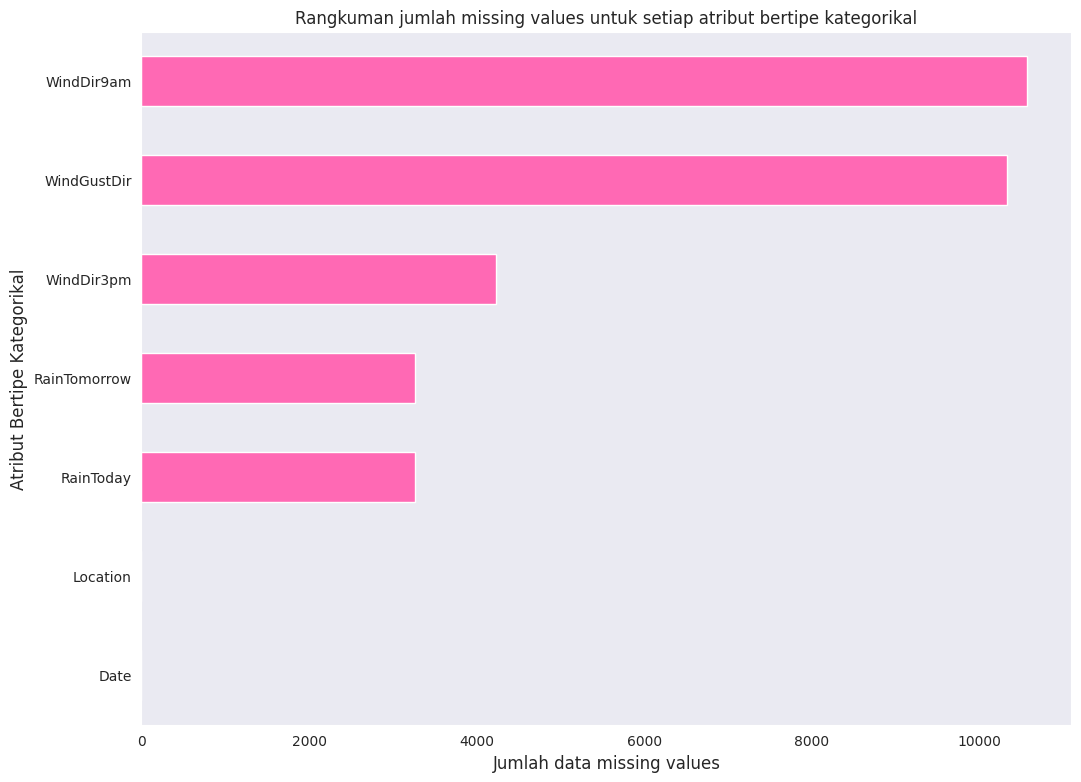

In [ ]:
categorical_missing_values =  df[categorical_columns].isnull().sum().sort_values()

# Bar plot untuk menunjukkan besaran missing values pada atribut categorical
plt.figure(figsize = (12,9))
categorical_missing_values.plot(kind = 'barh', color = 'hotpink')
plt.title('Rangkuman jumlah missing values untuk setiap atribut bertipe kategorikal', size = 12)
plt.xlabel('Jumlah data missing values', size = 12)
plt.ylabel('Atribut Bertipe Kategorikal', size = 12)
plt.show()

**ANALISIS:**
1. Missing values untuk atribut kategorikal akan ditangani dengan cara mengisi nilai nan dengan **modus** dari suatu atribut.
2. Label kelas **RainTomorrow** ternyata mengandung cukup banyak missing values. Untuk label kelas, baris data yang mengandung missing values akan **dihapus**. Hal ini karena kita tidak memiliki pengetahuan tentang ilmu astronomi dan ilmu hujan, sehingga kita tidak bisa menentukan label kelas yang hilang secara manual dan mengisinya.

### Merangkum total *missing values* pada atribut numerikal

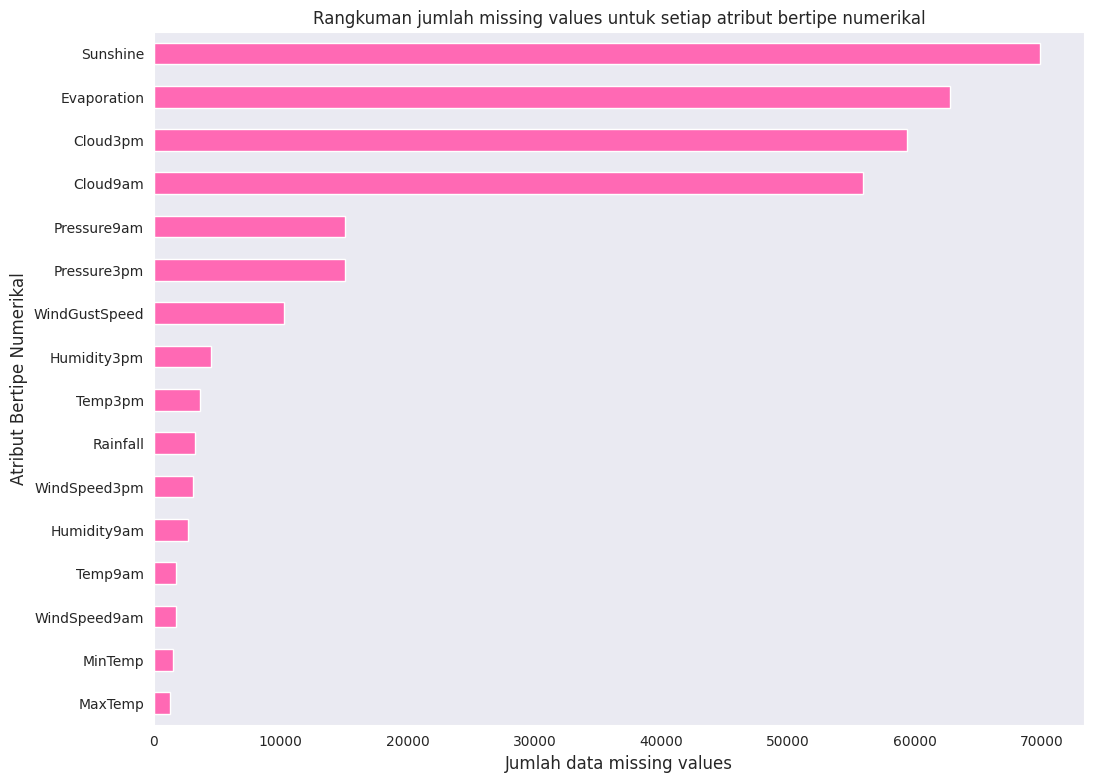

In [ ]:
numerical_missing_values = df[numerical_columns].isnull().sum().sort_values()

# Bar plot untuk menunjukkan besaran missing values pada atribut numerical
plt.figure(figsize = (12,9))
numerical_missing_values.plot(kind = 'barh', color = 'hotpink')
plt.title('Rangkuman jumlah missing values untuk setiap atribut bertipe numerikal', size = 12)
plt.xlabel('Jumlah data missing values', size=12)
plt.ylabel('Atribut Bertipe Numerikal', size=12)
plt.show()

**ANALISIS:**
1. Missing values untuk atribut numerikal akan ditangani dengan cara mengisi nilai nan dengan **median** dari suatu atribut. Nilai **median** digunakan karena relatif tidak sensitif dibandingkan dengan penggunaan nilai **mean**.

# Data Cleaning

In [ ]:
# Rename kolom dari datasets
def rename_columns_df(df):
    df = df.rename(
        columns = {
            'Date':'Tanggal',
            'Location':'Kota',
            'MinTemp':'Suhu Minimum',
            'MaxTemp':'Suhu Maximum',
            'Rainfall':'Curah Hujan',
            'Evaporation':'Penguapan',
            'Sunshine':'Jam Cerah',
            'WindGustDir':'Arah Angin 24 jam',
            'WindGustSpeed':'Kecepatan Angin 24 jam',
            'WindDir9am':'Arah Angin 9 Pagi',
            'WindDir3pm':'Arah Angin 3 Sore',
            'WindSpeed9am':'Kecepatan Angin 9 Pagi',
            'WindSpeed3pm':'Kecepatan Angin 3 Sore',
            'Humidity9am':'Kelembaban 9 Pagi',
            'Humidity3pm':'Kelembaban 3 Sore',
            'Pressure9am':'Tekanan Udara 9 Pagi',
            'Pressure3pm':'Tekanan Udara 3 Sore',
            'Cloud9am':'Awan 9 Pagi',
            'Cloud3pm':'Awan 3 Sore',
            'Temp9am':'Suhu Celcius 9 Pagi',
            'Temp3pm':'Suhu Celcius 3 Sore',
            'RainToday':'Hari ini Hujan',
            'RainTomorrow':'Hari besok Hujan',
        },
    )
    return df

# Memilih atribut numerikal dan kategorikal
def attributes_type(df,include_numerical=['float64','int64'], include_categorical=['object']):
    numerical_columns = df.select_dtypes(include = include_numerical).columns.values
    categorical_columns = df.select_dtypes(include=include_categorical).columns.values
    return numerical_columns,categorical_columns

### Me-*rename* nama kolom

In [ ]:
df = rename_columns_df(df)

# Kelompokkan atribut berdasarkan tipe datanya
numerical_columns, categorical_columns = attributes_type(df)

In [ ]:
# Menampilkan 5 data teratas setelah nama kolom direname
df.head(5)

,Tanggal,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,...,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Hari besok Hujan
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Menghapus data yang label kelas ('Hari besok Hujan") mengandung *missing values*

In [ ]:
df.drop(df[df['Hari besok Hujan'].isnull()].index.values, inplace = True)

### Mengisi *missing values* pada atribut kategorikal kecuali label kelas
- - -
* Atribut bertipe kategorikal (kecuali label kelas) yang terdapat *missing values* akan ditangani dengan mengisinya dengan *modus*


In [ ]:
for cat_col in categorical_columns:
  df[cat_col].fillna(df[cat_col].mode()[0], inplace = True)

### Mengisi *missing values* pada atribut numerikal

In [ ]:
for num_col in numerical_columns:
  df[num_col].fillna(df[num_col].median(), inplace = True)

### Mengecek rangkuman total *missing values* untuk setiap kolom

In [ ]:
df.isnull().sum()

Tanggal                   0
Kota                      0
Suhu Minimum              0
Suhu Maximum              0
Curah Hujan               0
Penguapan                 0
Jam Cerah                 0
Arah Angin 24 jam         0
Kecepatan Angin 24 jam    0
Arah Angin 9 Pagi         0
Arah Angin 3 Sore         0
Kecepatan Angin 9 Pagi    0
Kecepatan Angin 3 Sore    0
Kelembaban 9 Pagi         0
Kelembaban 3 Sore         0
Tekanan Udara 9 Pagi      0
Tekanan Udara 3 Sore      0
Awan 9 Pagi               0
Awan 3 Sore               0
Suhu Celcius 9 Pagi       0
Suhu Celcius 3 Sore       0
Hari ini Hujan            0
Hari besok Hujan          0
dtype: int64

In [ ]:
# Menampilkan data teratas setelah penanganan missing values
df.head()

,Tanggal,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,...,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Hari besok Hujan
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


*Missing values* pada dataset sudah berhasil ditangani untuk atribut kategorikal dan numerikal

### Menghapus kolom yang tidak dipakai
- - -
Kolom **Tanggal** akan diubah menjadi tipe *datetime*, lalu akan di-*breakdown* menjadi **Tahun, Bulan, Hari**. Selanjutnya kolom **Tanggal** akan dihapus

In [ ]:
# Mengubah tipe data menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Ambil Tahun,Bulan,Hari dan jadikan atribut
df['Tahun'] = df['Tanggal'].dt.year
df['Bulan'] = df['Tanggal'].dt.month_name()
df['Hari'] = df['Tanggal'].dt.day_name()

# Drop kolom "Tanggal"
df = df.drop(columns = 'Tanggal', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Kota                    142193 non-null  object 
 1   Suhu Minimum            142193 non-null  float64
 2   Suhu Maximum            142193 non-null  float64
 3   Curah Hujan             142193 non-null  float64
 4   Penguapan               142193 non-null  float64
 5   Jam Cerah               142193 non-null  float64
 6   Arah Angin 24 jam       142193 non-null  object 
 7   Kecepatan Angin 24 jam  142193 non-null  float64
 8   Arah Angin 9 Pagi       142193 non-null  object 
 9   Arah Angin 3 Sore       142193 non-null  object 
 10  Kecepatan Angin 9 Pagi  142193 non-null  float64
 11  Kecepatan Angin 3 Sore  142193 non-null  float64
 12  Kelembaban 9 Pagi       142193 non-null  float64
 13  Kelembaban 3 Sore       142193 non-null  float64
 14  Tekanan Udara 9 Pagi

### Mengelompokkan atribut berdasarkan tipe datanya
- - -
1. Atribut Numerikal
*   *continous*
*   *discrete*

2. Atribut Kategorikal
*   ordinal
*   nominal





In [ ]:
numerical_columns,categorical_columns = attributes_type(df)

# numerical
discrete_columns = ['Awan 9 Pagi','Awan 3 Sore','Tahun']
continuous_columns = [col for col in numerical_columns if col not in discrete_columns]

# categorical
ordinal_columns = ['Hari ini Hujan', 'Hari besok Hujan']
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

# Eksplorasi Data

## Melakukan Data *Query*, *Grouping*, dan Visualisasi

In [ ]:
# Menyiapkan List Warna untuk kebutuhan visualisasi grafik
colors_list = ['hotpink', 'lightslategray', 'cornflowerblue', 'darkseagreen', 'salmon', 'burlywood', 'lightskyblue', 'khaki']

### Presentase setiap label kelasnya

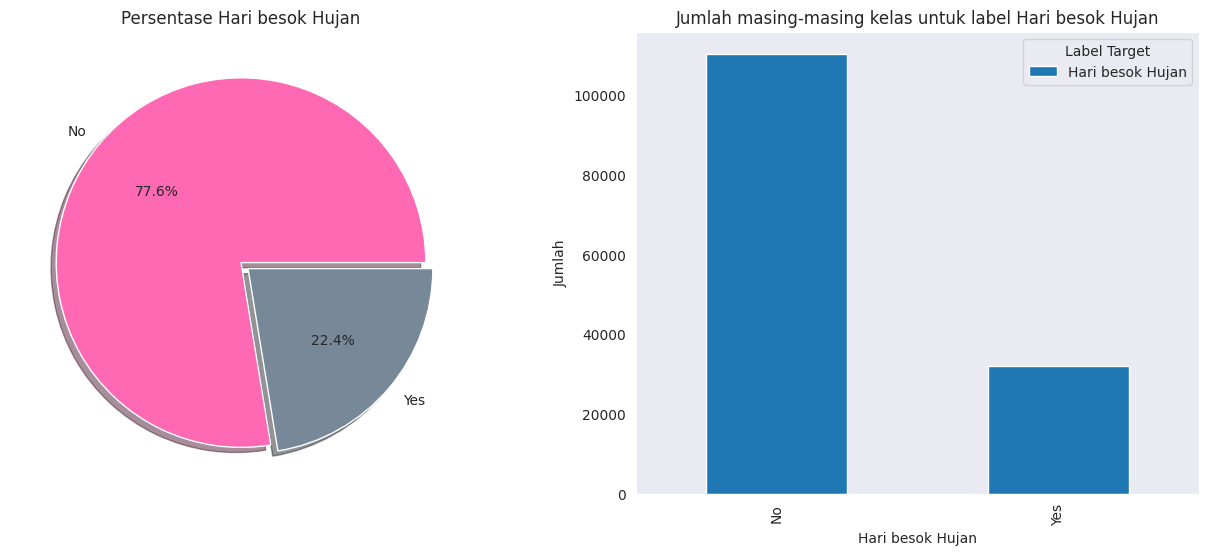

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))

# Persentase "Hari besok Hujan"
df['Hari besok Hujan'].value_counts().plot(
    kind = 'pie',
    autopct = '%.1f%%',
    explode = [0, 0.05], 
    shadow = True,
    ax = ax[0],
    colors = colors_list
)
ax[0].set_title('Persentase Hari besok Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('Hari besok Hujan').agg({'Hari besok Hujan':'count'}).plot(
    kind = 'bar',
    ax = ax[1],
    )
ax[1].set_title('Jumlah masing-masing kelas untuk label Hari besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')
ax[1].legend(title = 'Label Target')

**ANALISIS:**
1. Persentase 'Hari besok Hujan' untuk label **Yes** sebesar 22,4% dan label **No** sebesar 77,6%.
2. Ada imbalanced label pada sampel dataset, label **No** 3x lebih banyak dibandingkan label **Yes**
3. Hal ini mungkin akan menyebabkan pengaruh ke model klasifikasi dalam menghasilkan *recall* yang tidak optimal. **Sampling** mungkin diperlukan dalam melatih model dengan subsampel yang seimbang

### Persentase "Hari besok Hujan" berdasarkan Kota

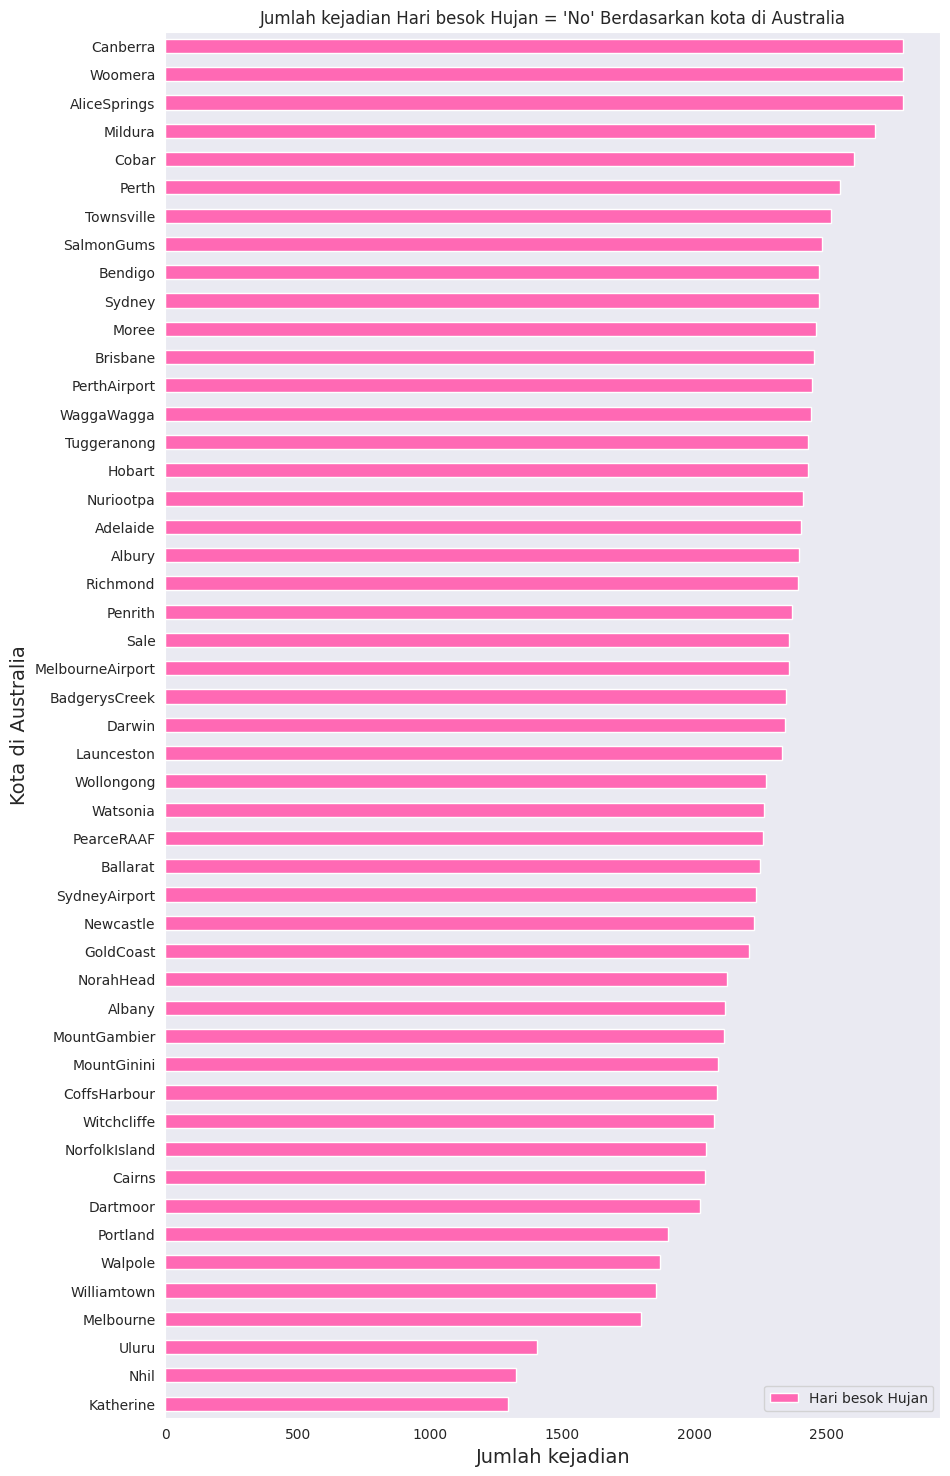

In [ ]:
# Kelompokkan data berdasarkan Kota untuk label = 'No'
kota_no = df[
    (df['Hari besok Hujan'] == "No")].groupby('Kota').agg({'Hari besok Hujan':'count'}).sort_values(by = 'Hari besok Hujan')
kota_no.plot(kind = 'barh', figsize = (10,18), color = ['hotpink'])

plt.ylabel("Kota di Australia", size = 14)
plt.xlabel("Jumlah kejadian", size = 14)
plt.title("Jumlah kejadian Hari besok Hujan = 'No' Berdasarkan kota di Australia")
plt.legend()
plt.show()

Kota **Canberra, Woomera, AliceSprings, Mildura, Cobar** menjadi lima kota dengan data kejadian "Hari besok Hujan" berlabel 'No' tertinggi (Tidak ada kejadian hujan di hari besoknya)

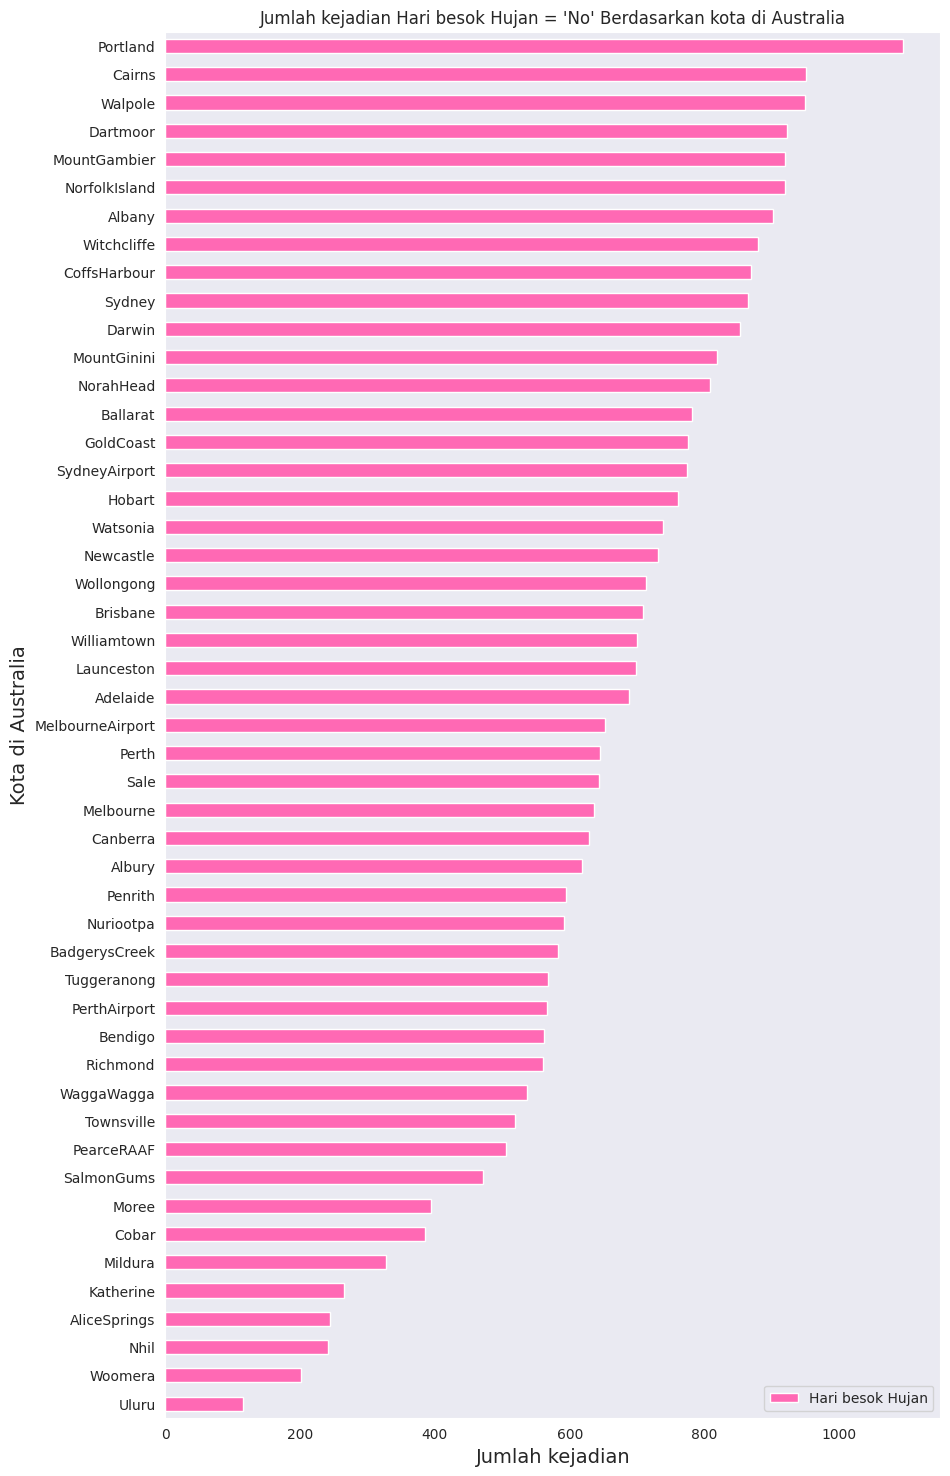

In [ ]:
# Kelompokkan data berdasarkan Kota untuk label = 'Yes'
kota_no = df[
    (df['Hari besok Hujan'] == "Yes")].groupby('Kota').agg({'Hari besok Hujan':'count'}).sort_values(by = 'Hari besok Hujan')
kota_no.plot(kind = 'barh', figsize = (10,18), color = ['hotpink'])

plt.ylabel("Kota di Australia", size = 14)
plt.xlabel("Jumlah kejadian", size = 14)
plt.title("Jumlah kejadian Hari besok Hujan = 'No' Berdasarkan kota di Australia")
plt.legend()
plt.show()

Kota **Portland, Caims, Walpole, Dartmoor, MountGambier** menjadi lima kota dengan data kejadian "Hari besok Hujan" berlabel 'Yes' tertinggi (Ada kejadian hujan di hari besoknya)

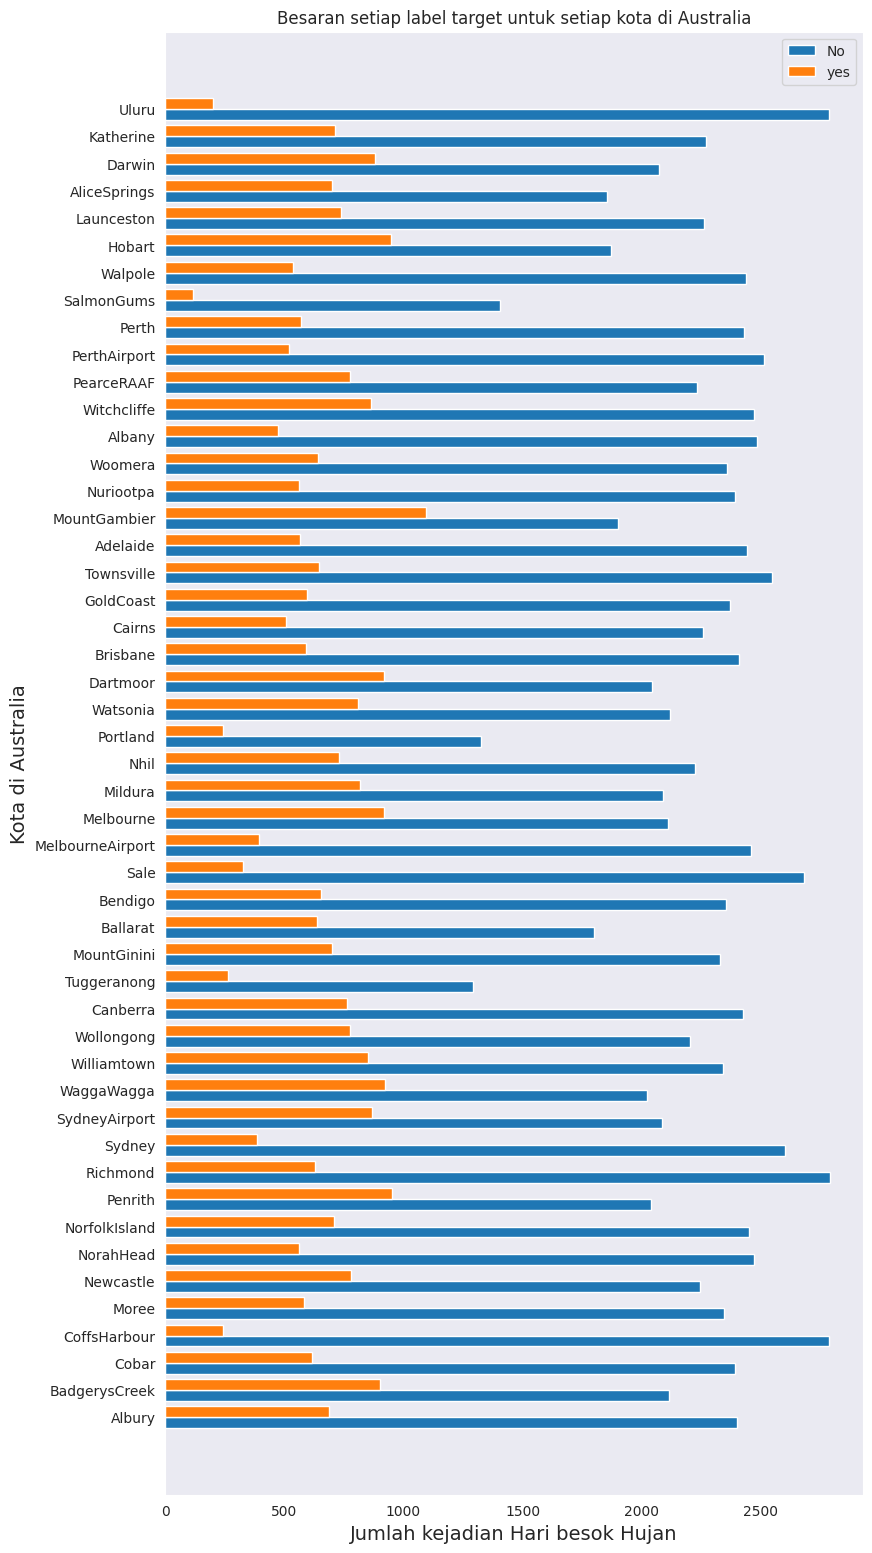

In [ ]:
# Target 'No' berdasarkan kota
kota_no = df[
    (df['Hari besok Hujan']=="No")
].groupby('Kota').count()['Hari besok Hujan'].values

# Target 'Yes' berdasarkan kota
kota_yes = df[
    (df['Hari besok Hujan']=="Yes")
].groupby('Kota').count()['Hari besok Hujan'].values

# Visualize
sumbu_y_ticks = list(df['Kota'].unique())
sumbu_y_axis = np.arange(0,len(sumbu_y_ticks), 1)

plt.figure(figsize = (9,19))
plt.barh(sumbu_y_axis - 0.2, kota_no, 0.4, label = 'No')
plt.barh(sumbu_y_axis + 0.2, kota_yes, 0.4, label = 'yes')
plt.yticks(sumbu_y_axis,sumbu_y_ticks, )
plt.ylabel("Kota di Australia", size = 14)
plt.xlabel("Jumlah kejadian Hari besok Hujan", size = 14)
plt.title("Besaran setiap label target untuk setiap kota di Australia")
plt.legend()
plt.show()

#### Menampilkan histogram untuk setiap atribut bertipe continous
- - -
- Untuk mengetahui distribusi data
- Untuk mengetahui ada atau tidaknya outliers

**Encode Categorical Columns agar bisa didistribusikan**

In [ ]:
labelencoder_visualize = OrdinalEncoder()
df[categorical_columns] = labelencoder_visualize.fit_transform(df[categorical_columns])

In [ ]:
def visualize_data_distribution(data_df, features, targetName = 'Hari besok Hujan', targetLabel = ['No','Yes']):
    """
        Definition : Function for visualize diagram for all features
        Parameters : 
            * Features --> List of features
        Return : 0
    """
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize = (15, 4))
        plt.title(col)
        plt.subplot(131)
        sns.histplot(
            data_df[col][data_df[targetName] == 0],
            label = targetLabel[0]+" :"+" Skew = " + str(np.round(data_df[col][data_df[targetName] == 0].skew(), 2)),
            kde = True,
            color = 'b',
            stat = "density",
            linewidth = 0
        )
        sns.histplot(
            data_df[col][data_df[targetName] == 1],
            label = targetLabel[1]+" :"+" Skew = " + str(np.round(data_df[col][data_df[targetName] == 1].skew(), 2)),
            kde = True,
            color = 'r',
            stat = "density",
            linewidth = 0
        )
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x = data_df[targetName],
            y = data_df[col],
            hue = data_df[targetName])
        plt.subplot(133)
        stats.probplot(x = data_df[col], plot = plt)
        plt.tight_layout()
        plt.show()

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


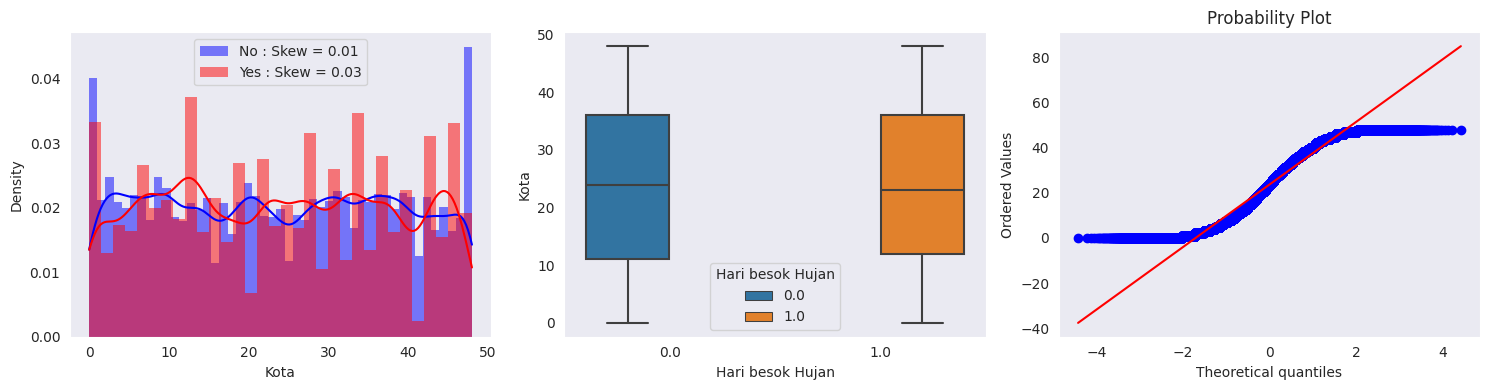

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


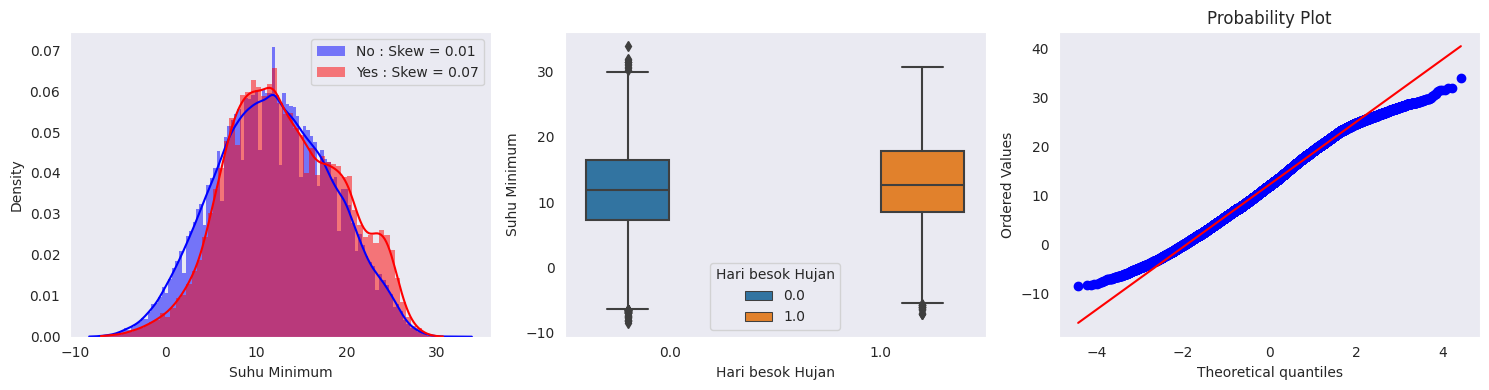

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


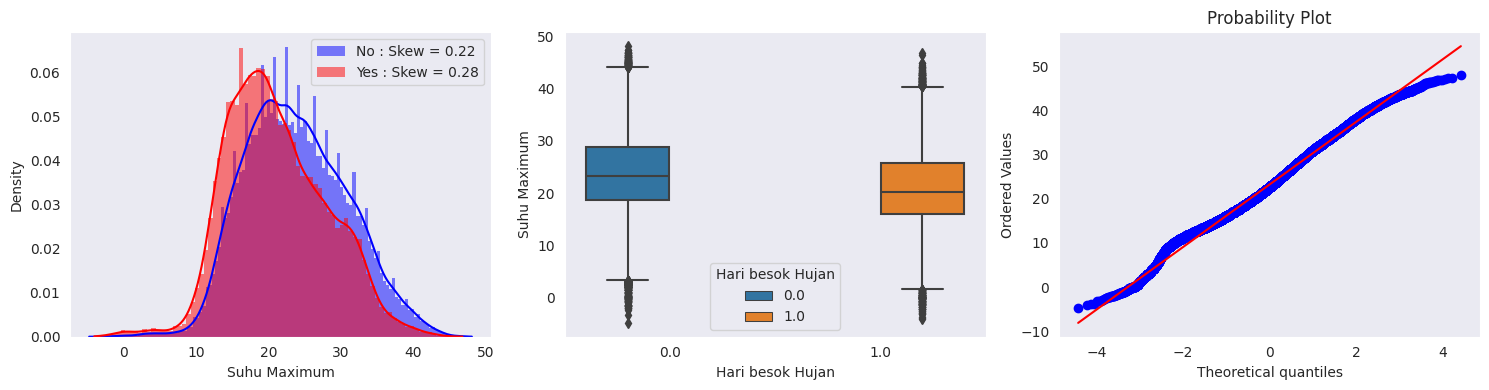

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


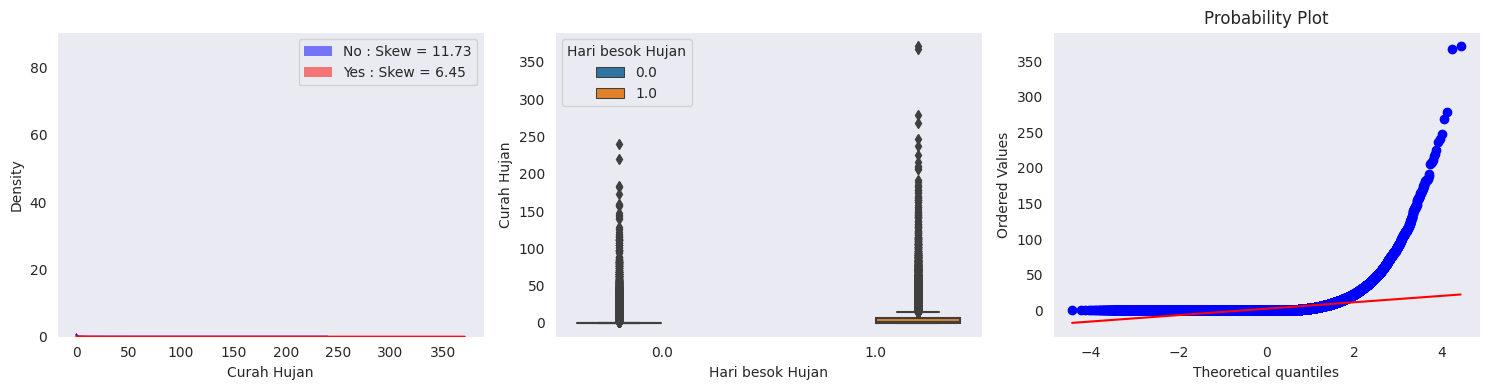

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


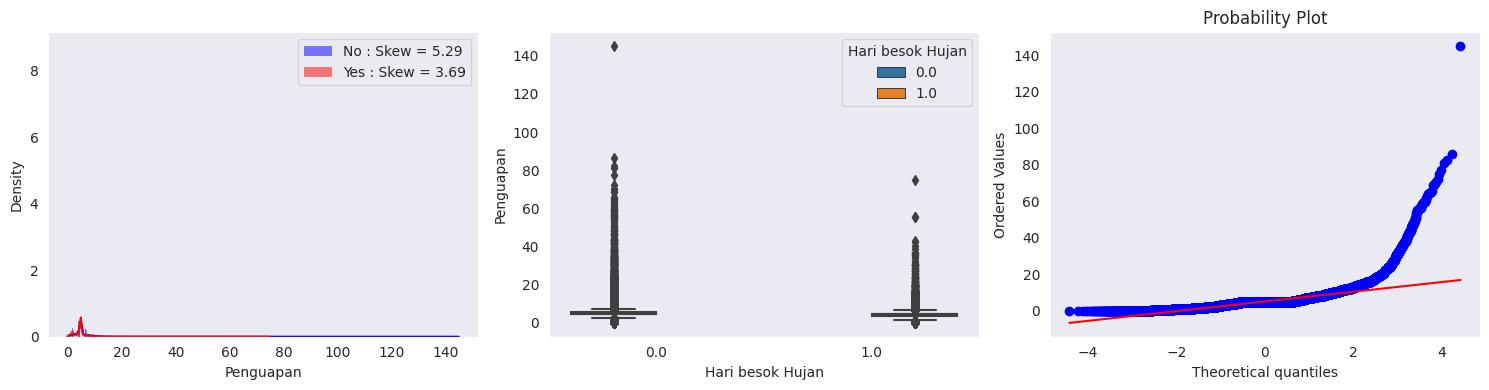

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


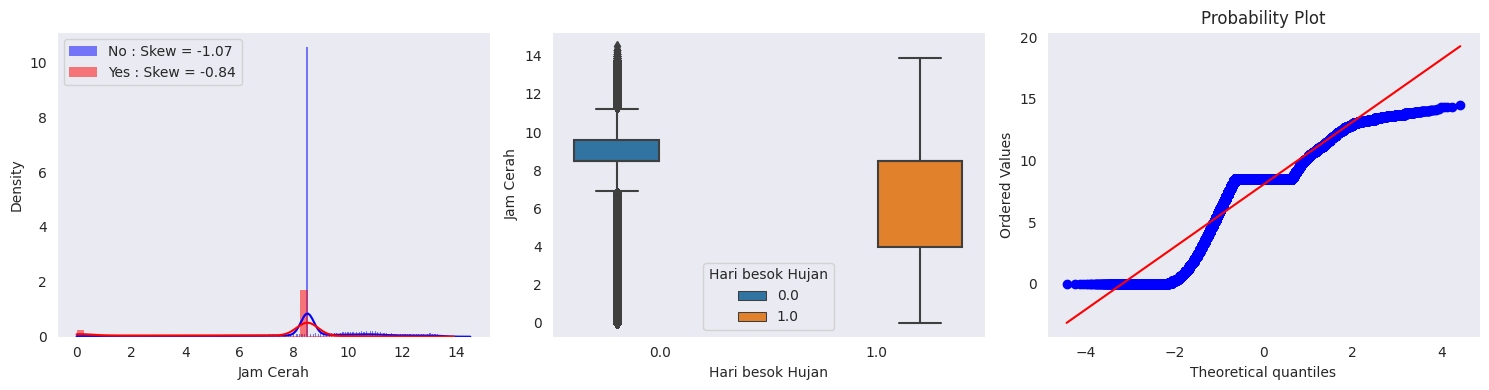

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


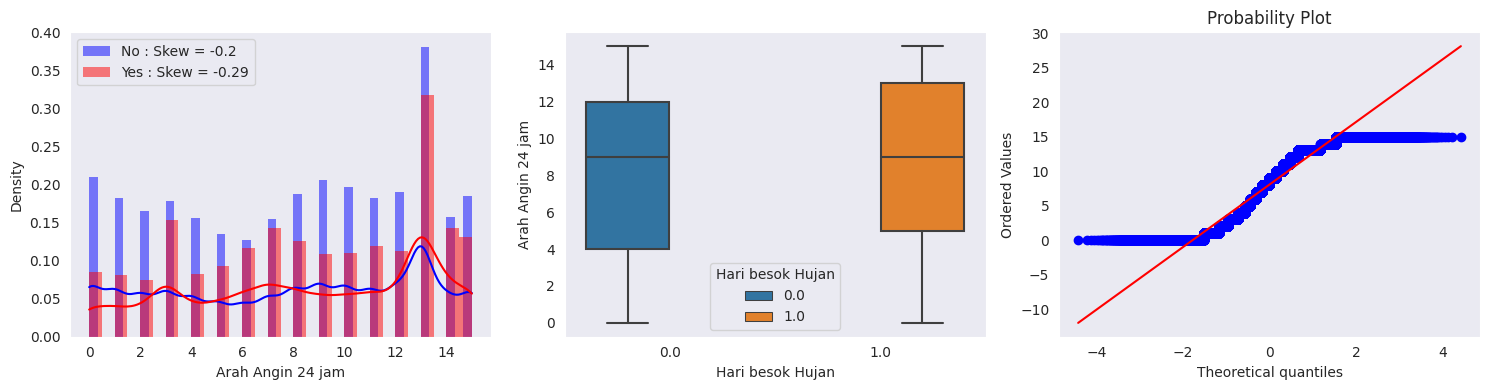

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


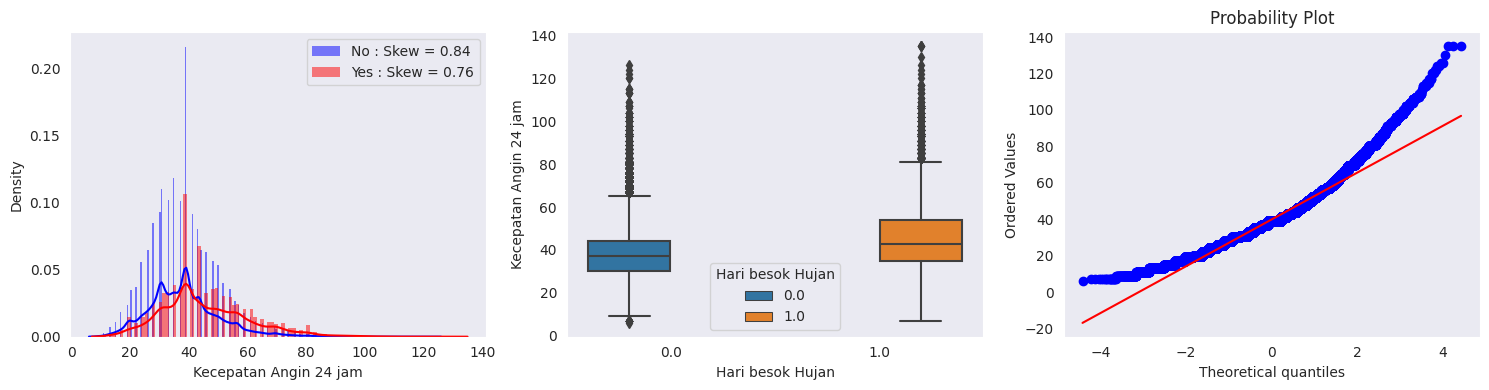

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


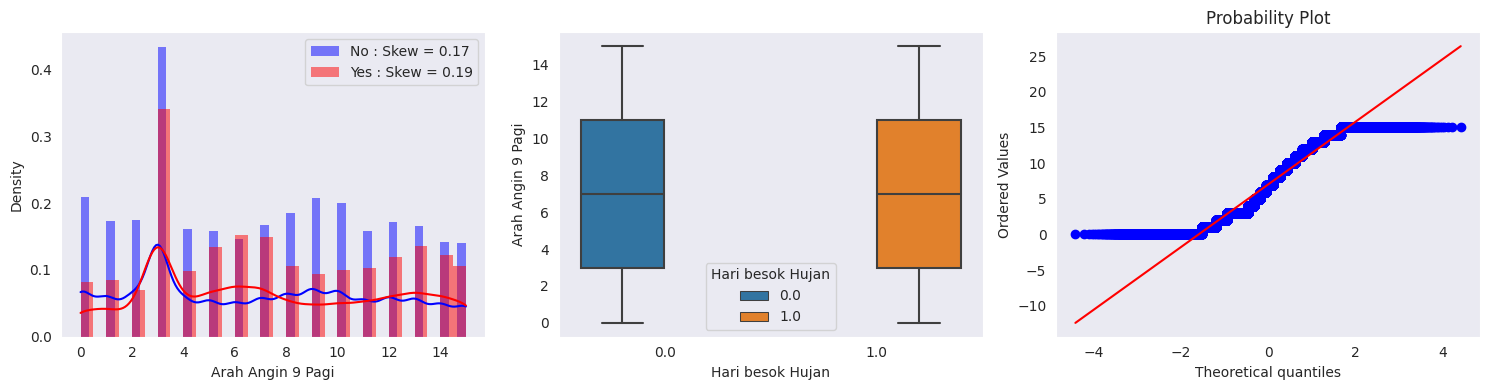

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


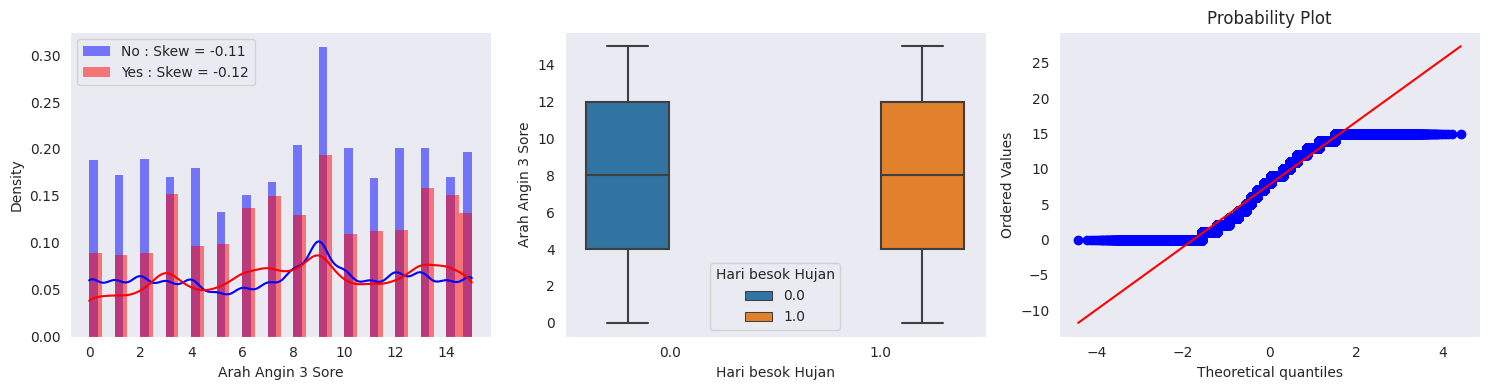

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


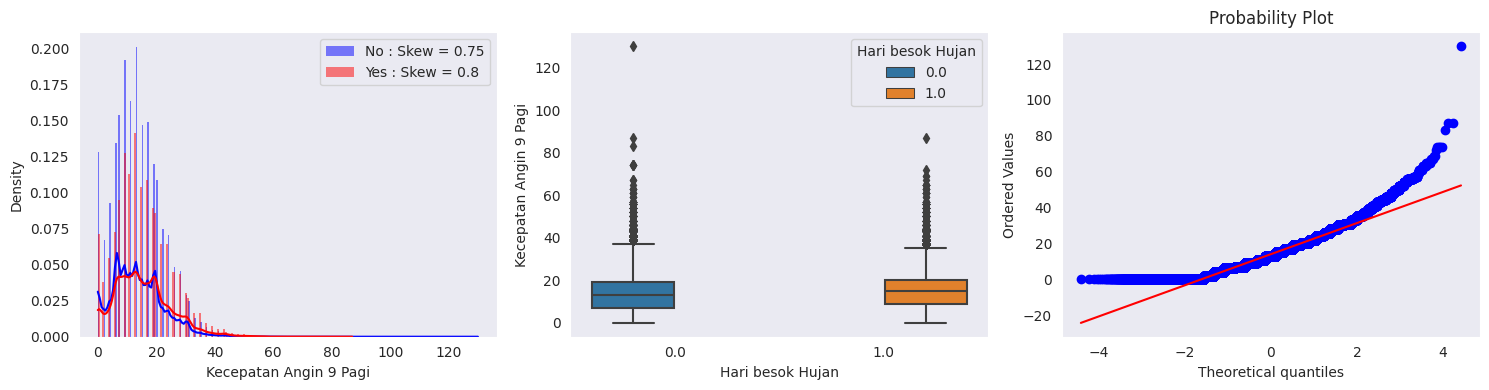

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


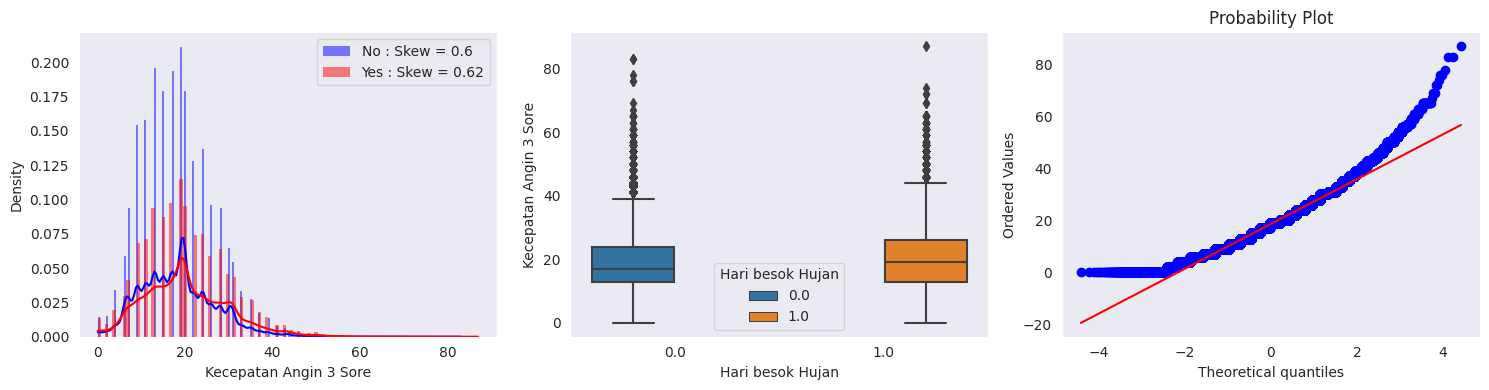

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


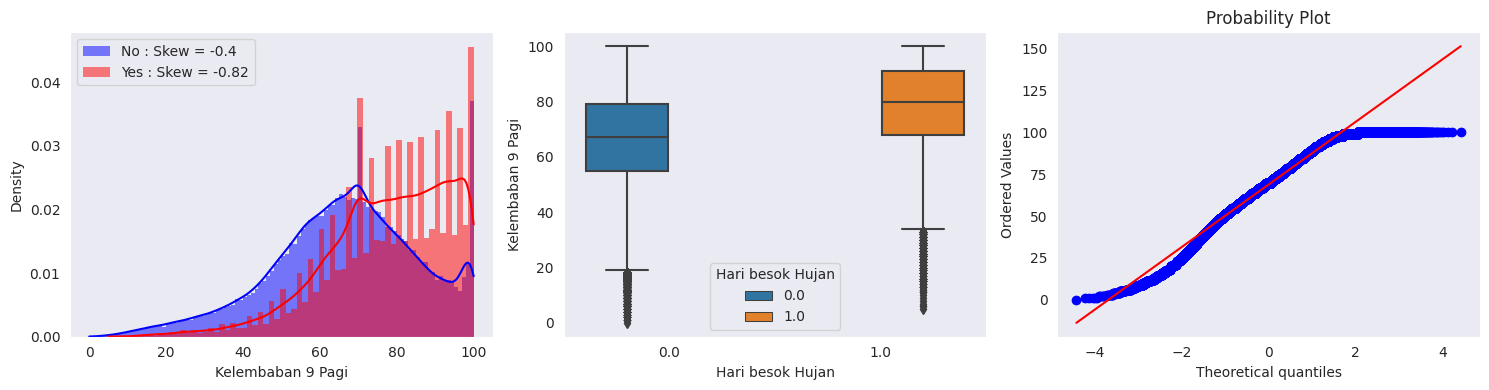

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


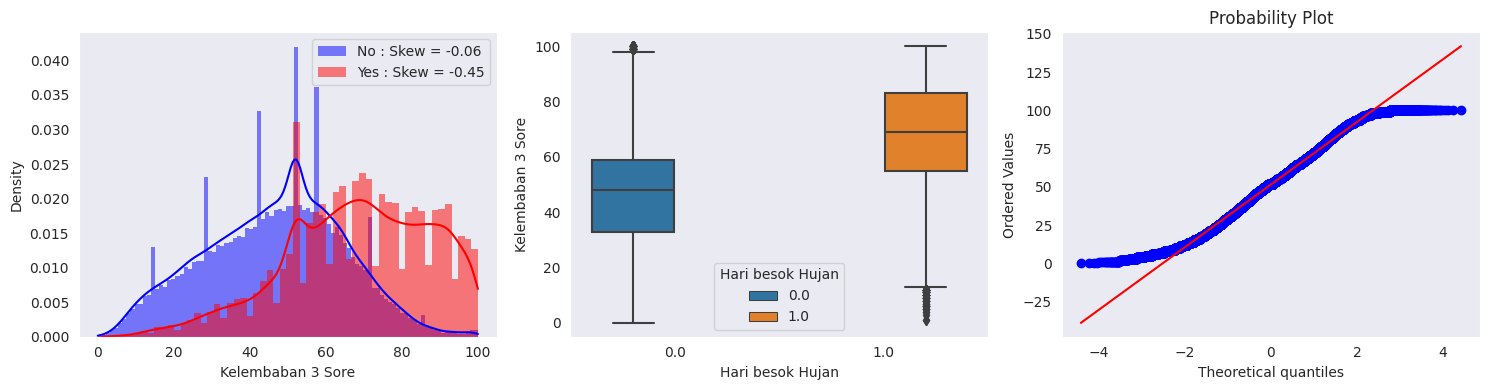

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


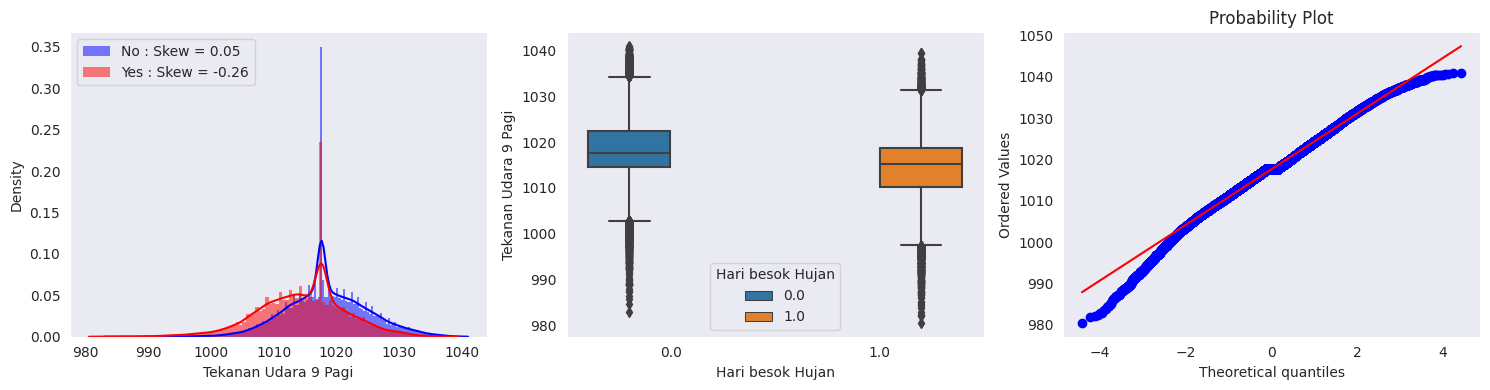

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


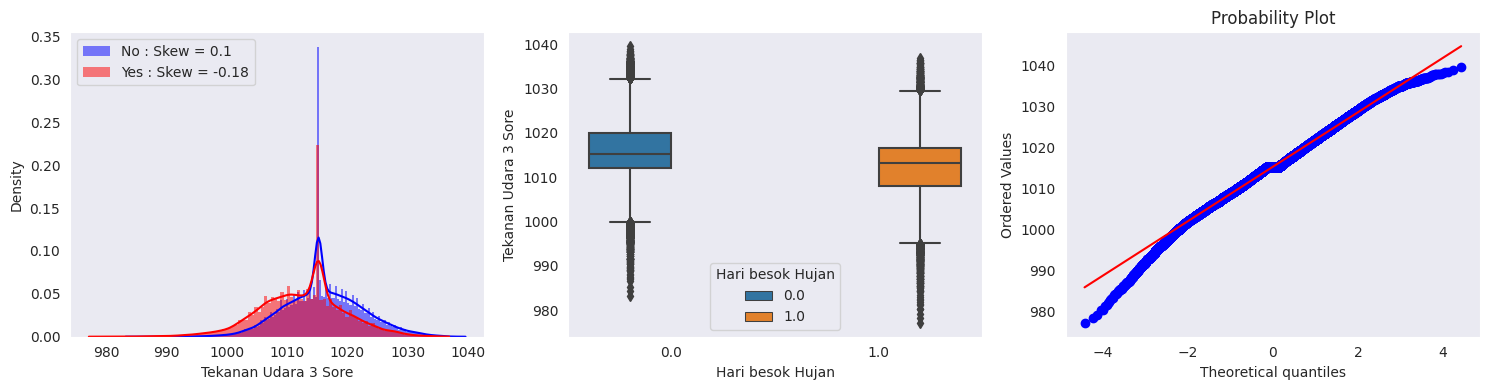

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


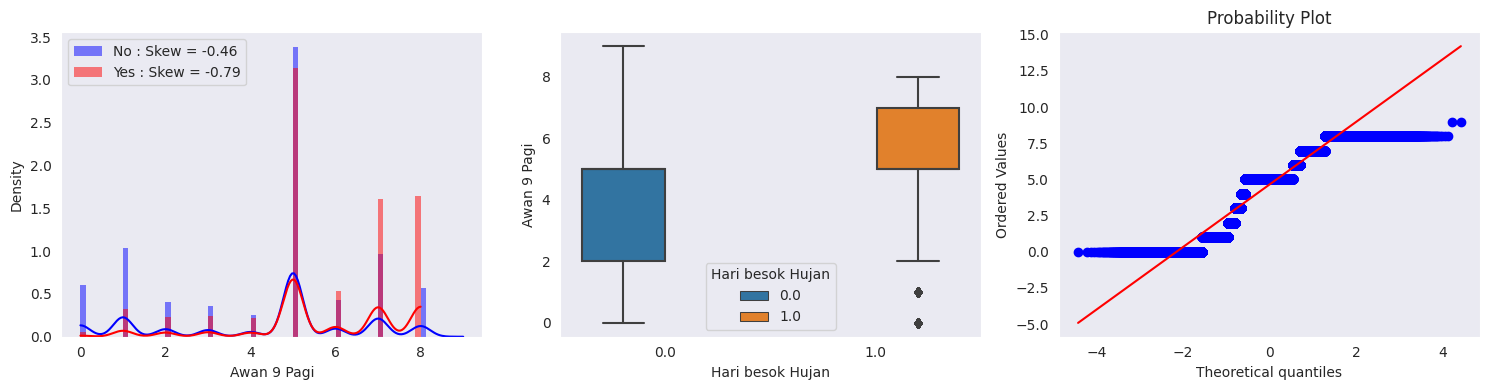

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


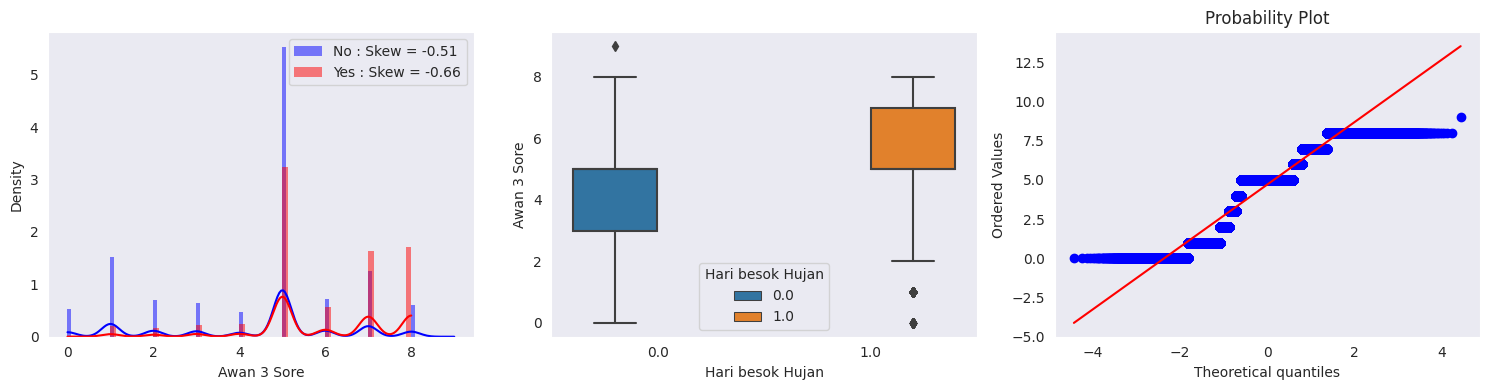

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


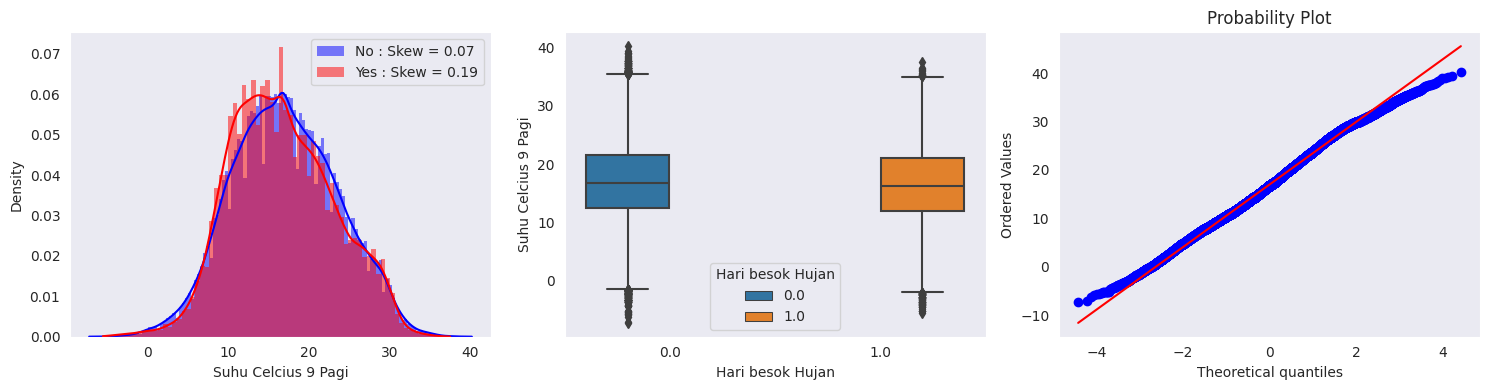

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


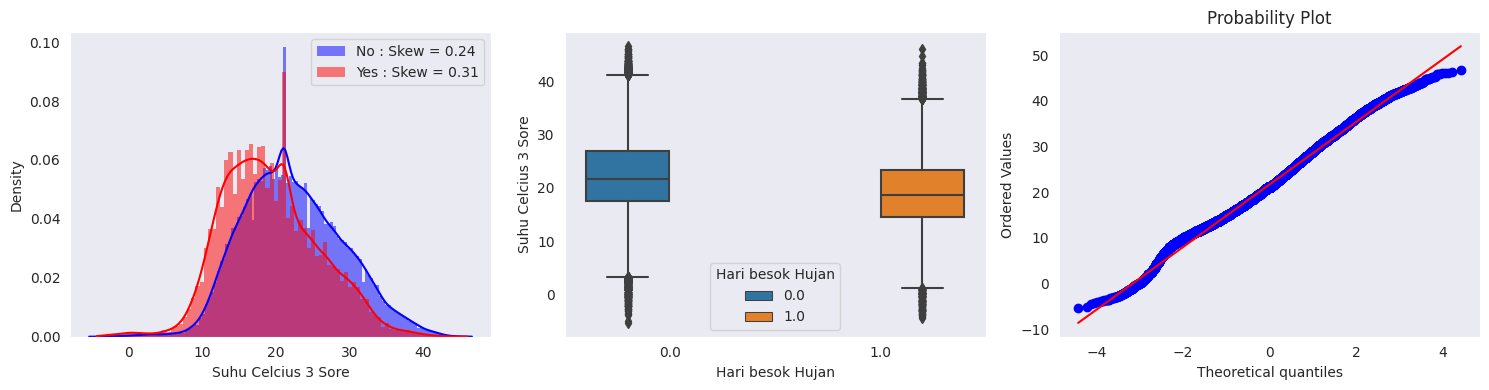

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


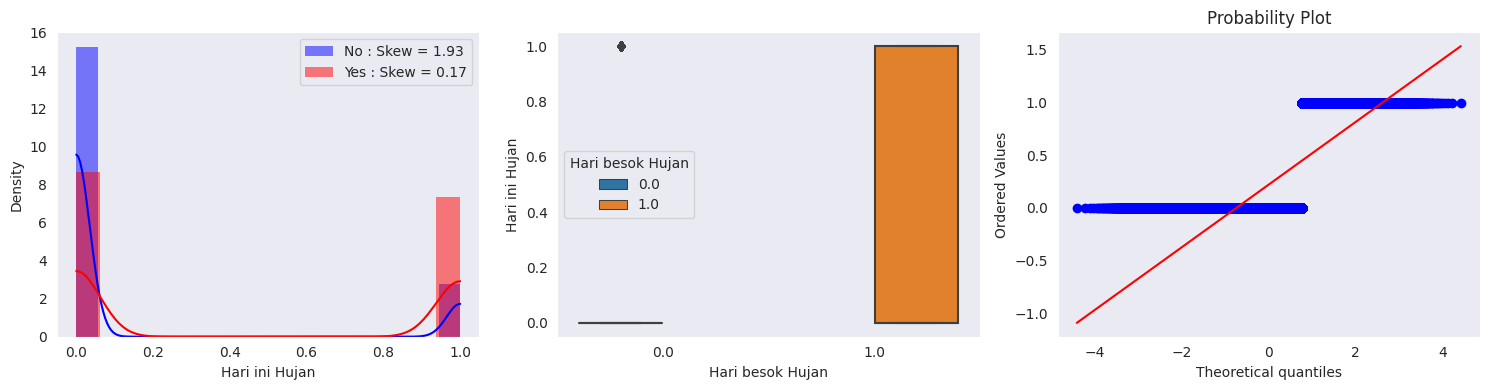

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


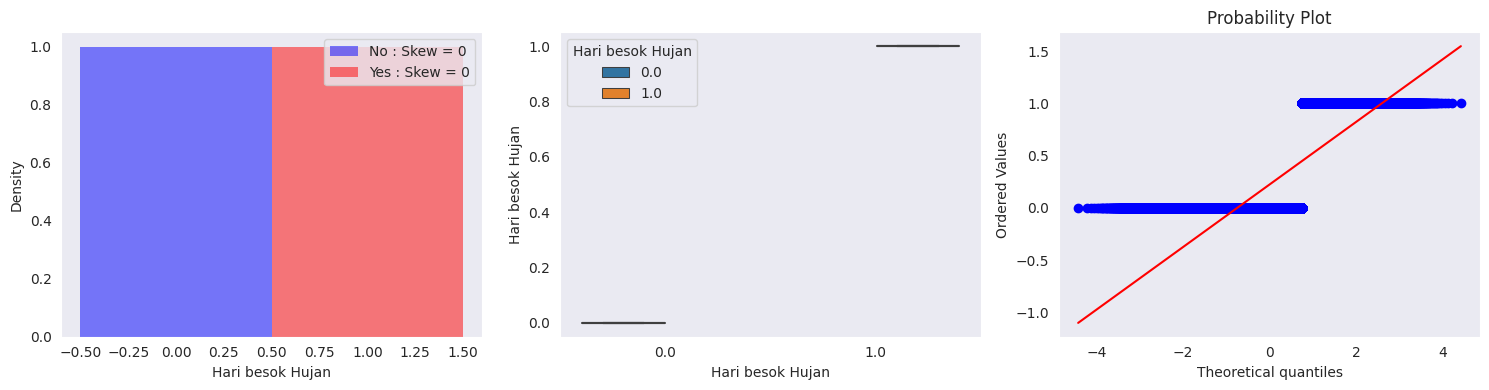

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


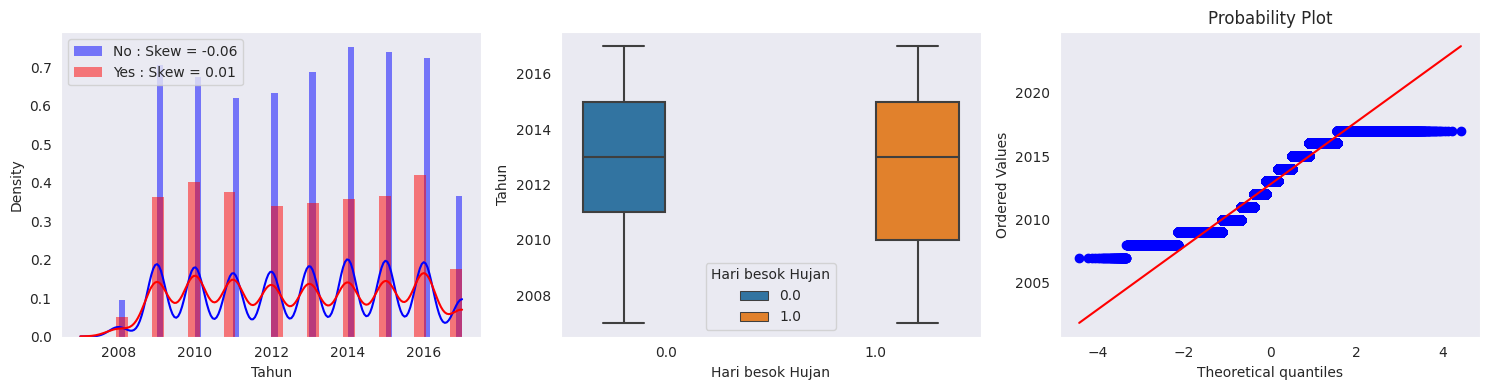

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


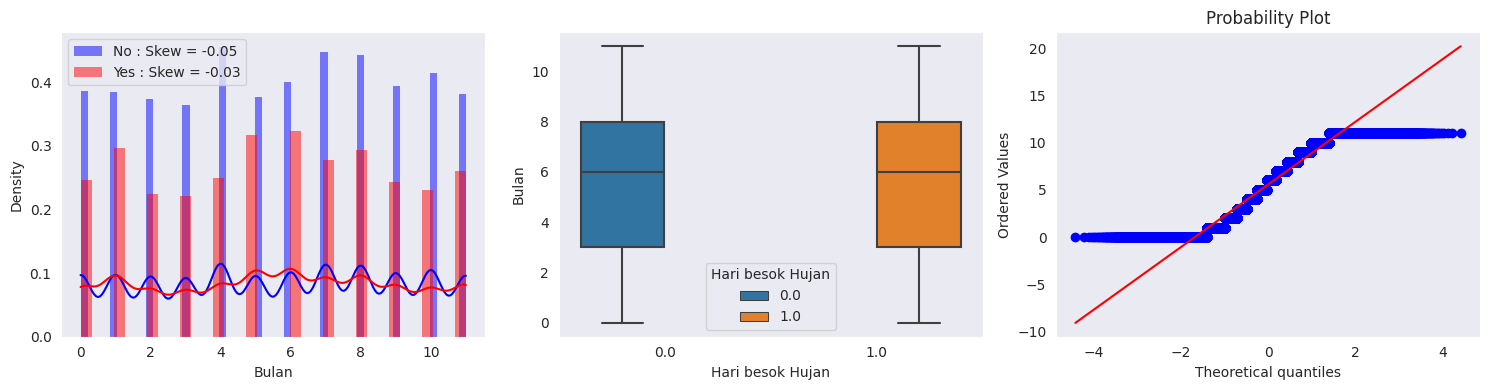

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


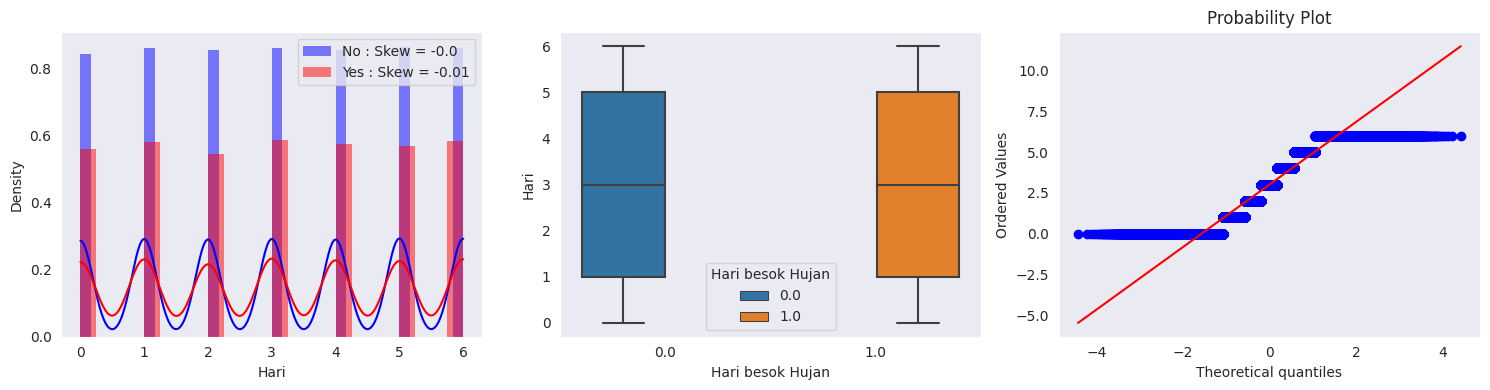

In [ ]:
visualize_data_distribution(df,df.columns.values)

**ANALISIS:** <br>
1. Masih ada beberapa atribut yang distribusinya tidak normal dan cenderung skew.
2. Ada beberapa atribut yang mengandung outliers
3. Seluruh atribut continous (kecuali **Kelembaban 3 Sore**) memiliki outliers yang cukup signifikan
4. Untuk atribut numerikal,ada beberapa atribut yang distribusi kedua kelasnya tidak sama, seperti **Curah Hujan, Penguapan, Jam Cerah, Kelembaban 9 Pagi, Kelembaban 3 Sore, Tekanan Udara 9 Pagi, Suhu Celcius 3 Sore**

### Apakah ada hubungan "Hari ini Hujan" dengan "Hari besok Hujan"?

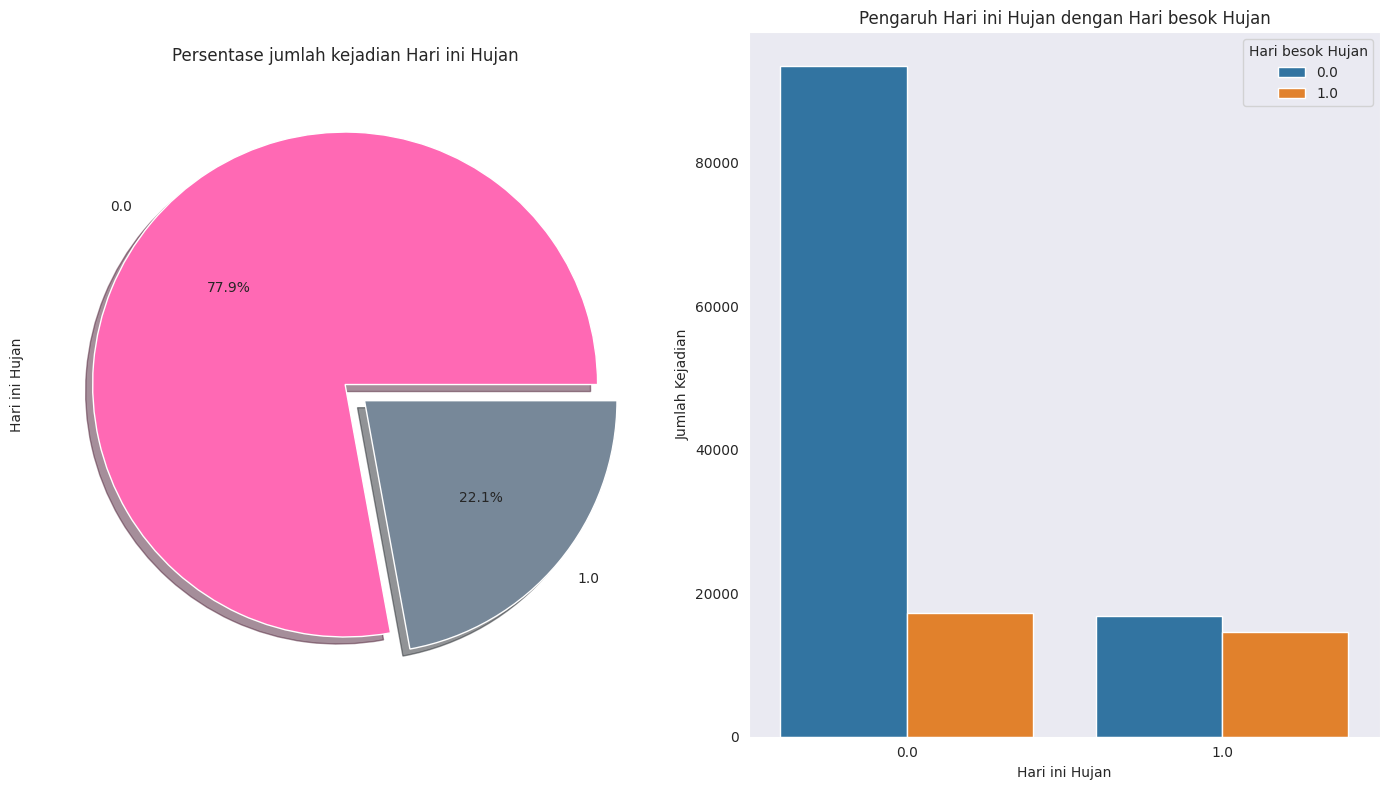

In [ ]:
fig,ax = plt.subplots(1, 2, figsize = (14,8))

# Persentase 'Hari ini Hujan' dalam pie chart
df['Hari ini Hujan'].value_counts().plot(
    kind = 'pie', 
    ax = ax[0], 
    autopct = '%.1f%%',
    explode = [0,0.1], 
    shadow = True,
    colors = colors_list
)
ax[0].set_title('Persentase jumlah kejadian Hari ini Hujan')

# 
sns.countplot(
    x = 'Hari ini Hujan',
    hue = 'Hari besok Hujan',
    data = df
)
ax[1].set_title('Pengaruh Hari ini Hujan dengan Hari besok Hujan')
ax[1].set_ylabel('Jumlah Kejadian')
fig.tight_layout()

**ANALISIS:** <br>
- Ada 78,1% "Hari ini Hujan" berlabel "No
- Kalau "Hari ini Hujan" dengan label 'No' maka kemungkinan besar 'Hari besok Hujan' berlabel 'No'. 
- Jumlah kejadian untuk setiap pasangan lainnya adalah seimbang, jadi 'Hari ini Hujan' tidak bisa dijadikan satu-satunya penentu 'Hari besok Hujan'

## Melihat pengaruh atribut terhadap target

### Pengaruh atribut numerikal ke target kategorikal (ANOVA F-Score)
- - -
Untuk melihat pengaruh ini akan dihitung ANOVA F-Score dari setiap atribut terhadap kelas target

In [ ]:
# Menyiapkan data (atribut dan target) hanya untuk tipe numerikal
X_numerical = df.loc[:,numerical_columns]
y_numerical= df['Hari besok Hujan'].replace({'Yes':1,'No':0})

In [ ]:
# Instansiasi objek untuk anova
anova_fs = SelectKBest(score_func = f_classif, k = 'all')

# Fitting ke data
anova_fs = anova_fs.fit(X_numerical, y_numerical)

In [ ]:
df_anova_fs = pd.Series(data = anova_fs.scores_, index = numerical_columns).sort_values(ascending = False)

Text(0.5, 1.0, 'F-Score setiap atribut numerik terhadap Target')

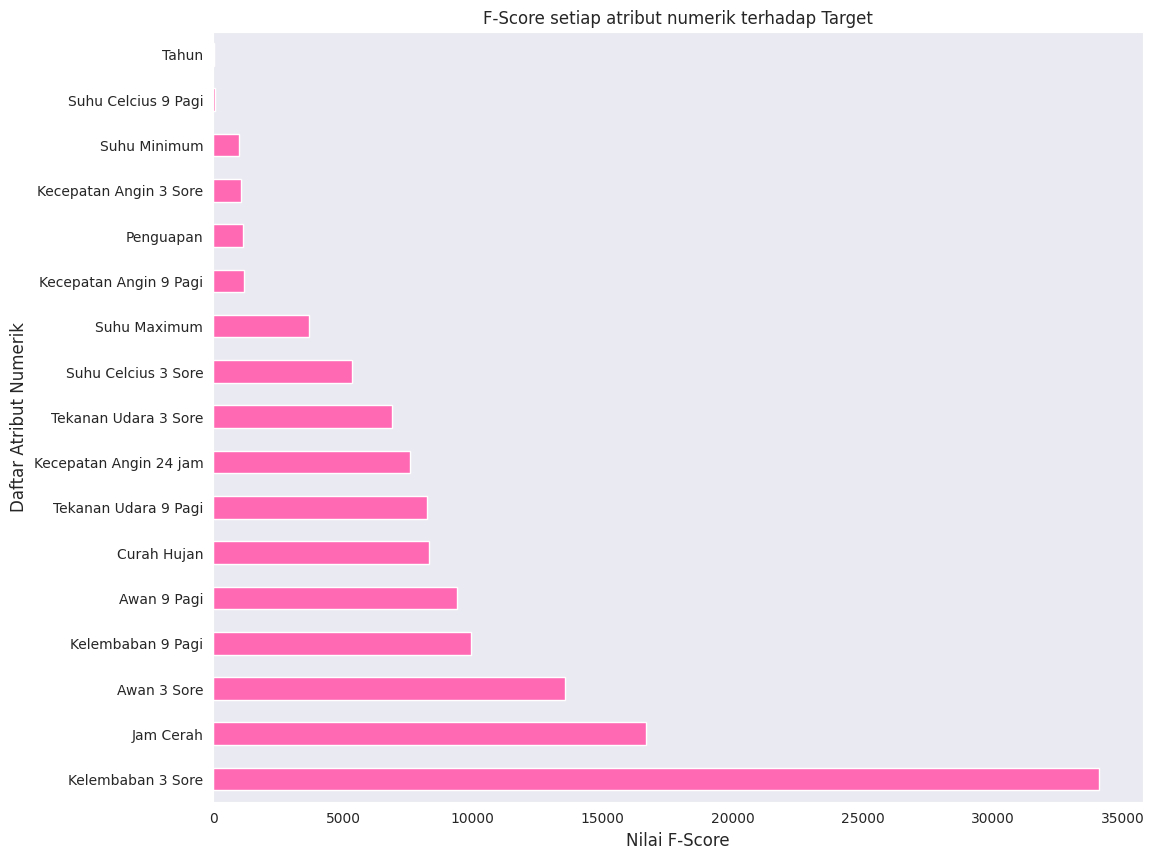

In [ ]:
# Plotting score setiap atribut
plt.figure(figsize = (12,10))
df_anova_fs.plot(kind = 'barh', color = 'hotpink')
plt.ylabel('Daftar Atribut Numerik', size = 12)
plt.xlabel('Nilai F-Score', size = 12)
plt.title('F-Score setiap atribut numerik terhadap Target', size = 12)

**ANALISIS:** <br>
Hasil ini bisa menjadi dasar dalam pengambilan keputusan pada langkah **Data Preprocessing** khususnya pada **Feature Engineering**. <br>
Interpretasi hasil gambar di atas: <br>
1. Semakin besar nilai F-score semakin besar hubungan atau korelasi atribut tersebut dengan kelas target
2. Semakin kecil nilai F-Score semakin kecil hubungan atau korelasi atribut tersebut dengan kelas target
3. Atribut **Tahun, Suhu Celcius 9 Pagi** menjadi dua atribut dengan kepentingan atribut terkecil dengan kelas target
4. Atribut **Kelembabab 3 Sore** paling menentukan apakah kejadian pada "Hari besok Hujan"

In [ ]:
# Pertahankan 3 atribut teratas (numerik)
numerical_columns_retain = list(df_anova_fs[:3].index.values)

### Pengaruh atribut kategorikal ke target kategorikal (*Mutual Information*)
***
Untuk melihat pengaruh ini bisa menggunakan *Mutual Information* dari setiap atribut terhadap kelas target

In [ ]:
# Remove atribut 'Hari besok Hujan' karena merupakan target yang ingin dicari 
ls_categorical_columns = list(categorical_columns)
ls_categorical_columns.remove('Hari besok Hujan')

In [ ]:
# Menyiapkan data (atribut dan target) hanya untuk tipe kategorikal
X_kategorikal = df[ls_categorical_columns]
y_kategorikal= y_numerical

In [ ]:
# Encoding categorical attributes
ordinal_encoder = OrdinalEncoder()

# Fit into data
ordinal_encoder = ordinal_encoder.fit(X_kategorikal)

# Transform into data
X_kategorikal_encoded = ordinal_encoder.transform(X_kategorikal)

In [ ]:
# Instansiasi objek MutualInformation
mutual_info_fs = SelectKBest(score_func = mutual_info_classif, k = 'all')

# Fit into encoded data
mutual_info_fs = mutual_info_fs.fit(X_kategorikal_encoded, y_kategorikal)

In [ ]:
df_mutual_info_fs = pd.Series(data = mutual_info_fs.scores_, index = ls_categorical_columns).sort_values(ascending = False)

Text(0.5, 1.0, 'Mutual Information setiap atribut kategorikal terhadap Target')

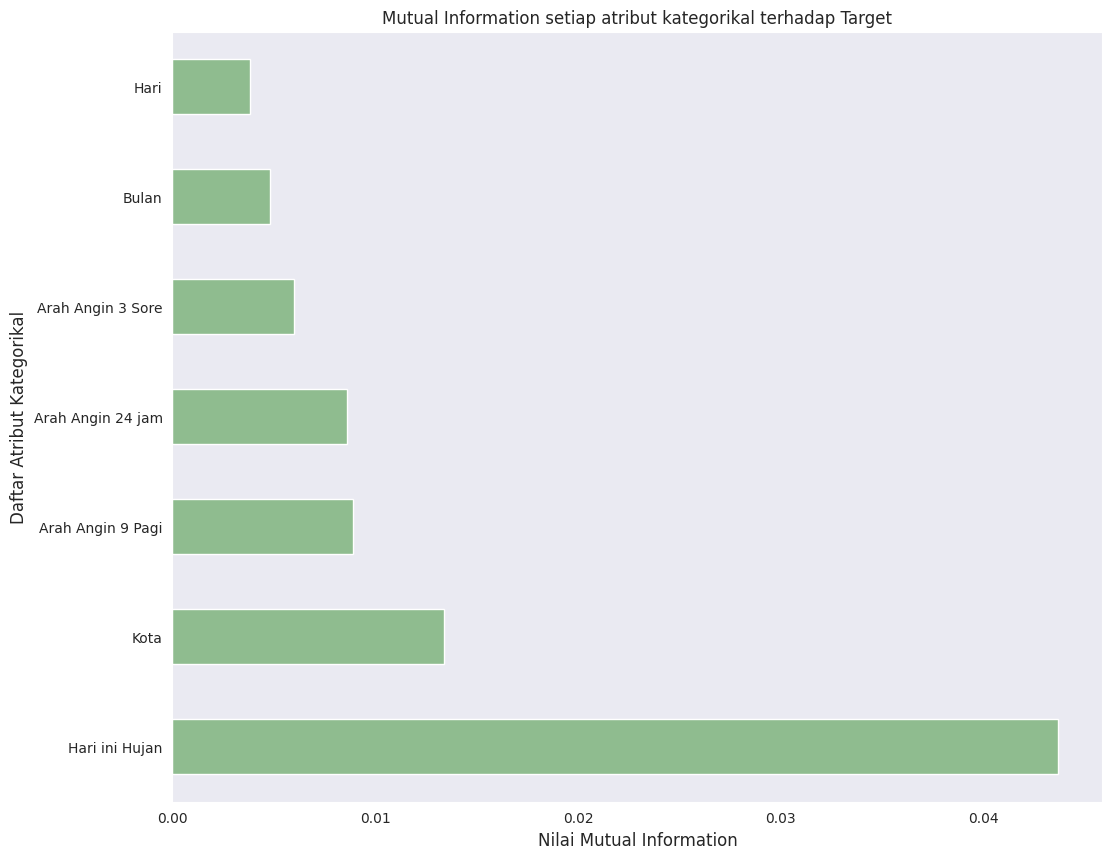

In [ ]:
# Plotting score setiap atribut kategorikal
plt.figure(figsize = (12,10))
df_mutual_info_fs.plot(kind = 'barh', color = 'darkseagreen')
plt.ylabel('Daftar Atribut Kategorikal', size = 12)
plt.xlabel('Nilai Mutual Information', size = 12)
plt.title('Mutual Information setiap atribut kategorikal terhadap Target', size = 12)

In [ ]:
# Mempertahankan 3 fitur kategorikal
categorical_columns_retain = list(df_mutual_info_fs[:3].index.values)

**ANALISIS:** <br>
Hasil ini bisa menjadi dasar dalam pengambilan keputusan pada langkah **Data Preprocessing** khususnya pada **Feature Engineering**. <br>
Interpretasi hasil gambar di atas: <br>
1. Semakin besar nilai Mutual Information semakin besar hubungan atau korelasi atribut tersebut dengan kelas target
2. Semakin kecil nilai Mutual Information semakin kecil hubungan atau korelasi atribut tersebut dengan kelas target
3. Atribut **Hari,Bulan** menjadi dua atribut dengan kepentingan atribut yang paling kecil dengan kelas target
4. Atribut yang dipertahankan **Hari ini Hujan, Kota, Arah Angin 9 Pagi**

## Menghitung *Central Tendency*

### *Mean*

In [ ]:
mean = df[numerical_columns].mean()

### *Median*

In [ ]:
median = df[numerical_columns].median()

### Rangkuman *Mean* dan *Median* 

In [ ]:
df_mean_median = pd.DataFrame(data = {
    'mean':mean,
    'median':median
}).transpose()
df_mean_median

,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Kecepatan Angin 24 jam,Kecepatan Angin 9 Pagi,Kecepatan Angin 3 Sore,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Tahun
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,1017.64846,1015.252481,4.649568,4.702658,16.985681,21.675977,2012.758926
median,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000


### Modus
- - -
Modus (*Mode*) bisa diterapkan untuk data bertipe kategorikal atau numerikal

In [ ]:
df.mode()

,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,...,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Hari besok Hujan,Tahun,Bulan,Hari
0,9.0,12.0,22.6,0.0,4.8,8.5,13.0,39.0,3.0,9.0,...,1015.2,5.0,5.0,16.7,21.1,0.0,0.0,2016,8.0,3.0


## Deskripsi Perhitungan *Central Tendency*

**ANALISIS PERHITUNGAN *CENTRAL TENDENCY***
1. Hampir mayoritas atribut bertipe numerikal memiliki nilai **mean**, **median**, dan **modus** yang hampir sama (selisihnya cukup kecil). Hal ini bisa menandakan bahwa mayoritas distribusi data pada atribut numerik cenderung simetris. Namun, masih ada beberapa atribut numerik yang selisih antara **mean** dan **median** nya cukup besar (cenderung tidak simetris), seperti **Curah Hujan, Penguapan, Kecepatan Angin 24 Jam, Kecepatan Angin 9 Pagi, dan Kelembaban 9 Pagi**
2. Atribut **Curah Hujan** memiliki **mean > median** (kecenderungan right skew) dan juga nilai **modus** sebesar **0**. Hal ini menandakan bahwa sampel data yang ada lebih banyak tidak ada curah hujannya. 
3. Mayoritas **Arah Angin 24 Jam** pada sampel dataset mengarah ke barat (**W**)
4. Sampel dataset didonimasi oleh label kelas 'Hari ini Hujan' dan 'Hari besok Hujan' berlabel **No**

## Menghitung *Measure of Spread (variability)*

### Sampel *Variance*

In [ ]:
# Menghitung sampel variance ddof = 1
df[numerical_columns].var(ddof = 1).sort_values()

Awan 3 Sore                 4.489116
Awan 9 Pagi                 5.264075
Tahun                       6.457981
Jam Cerah                   7.670892
Penguapan                  10.146782
Suhu Minimum               40.818501
Suhu Celcius 9 Pagi        41.889455
Tekanan Udara 3 Sore       44.646586
Tekanan Udara 9 Pagi       45.512123
Suhu Celcius 3 Sore        47.213976
Suhu Maximum               50.546653
Curah Hujan                71.004650
Kecepatan Angin 3 Sore     76.067840
Kecepatan Angin 9 Pagi     78.351074
Kecepatan Angin 24 jam    172.676204
Kelembaban 9 Pagi         358.439999
Kelembaban 3 Sore         421.572336
dtype: float64

### Sampel *Standard Deviation*

In [ ]:
# Menghitung sampel standard deviation ddof = 1
df[numerical_columns].std(ddof = 1).sort_values()

Awan 3 Sore                2.118753
Awan 9 Pagi                2.294357
Tahun                      2.541256
Jam Cerah                  2.769638
Penguapan                  3.185401
Suhu Minimum               6.388936
Suhu Celcius 9 Pagi        6.472206
Tekanan Udara 3 Sore       6.681810
Tekanan Udara 9 Pagi       6.746267
Suhu Celcius 3 Sore        6.871243
Suhu Maximum               7.109617
Curah Hujan                8.426426
Kecepatan Angin 3 Sore     8.721688
Kecepatan Angin 9 Pagi     8.851614
Kecepatan Angin 24 jam    13.140632
Kelembaban 9 Pagi         18.932512
Kelembaban 3 Sore         20.532227
dtype: float64

### *Skewness*

In [ ]:
df[numerical_columns].skew().sort_values(ascending = False)

Curah Hujan               9.934023
Penguapan                 5.140075
Kecepatan Angin 24 jam    0.918436
Kecepatan Angin 9 Pagi    0.782261
Kecepatan Angin 3 Sore    0.635020
Suhu Celcius 3 Sore       0.247242
Suhu Maximum              0.225763
Suhu Celcius 9 Pagi       0.092524
Kelembaban 3 Sore         0.033042
Suhu Minimum              0.024345
Tahun                    -0.042629
Tekanan Udara 3 Sore     -0.046081
Tekanan Udara 9 Pagi     -0.098977
Kelembaban 9 Pagi        -0.488110
Awan 9 Pagi              -0.551152
Awan 3 Sore              -0.562072
Jam Cerah                -1.110020
dtype: float64

### *Percentiles*

In [ ]:
# Menghitung kuartil 1,2,3
Q1, Q2, Q3 = df[numerical_columns].quantile(0.25), df[numerical_columns].quantile(0.5), df[numerical_columns].quantile(0.75)

# Menghitung IQR (selisih Q3 dengan Q1)
IQR = Q3 - Q1

### *Ranges*

In [ ]:
max = df[numerical_columns].max()
min = df[numerical_columns].min()
ranges =  max - min

### Menampilkan hasil pengukuran variabilitas

In [ ]:
df_variability = pd.DataFrame(data = {
    'Q1':Q1,
    'Q2':Q2,
    'Q3':Q3,
    'IQR':IQR,
    'Maximum':max,
    'Minimum':min,
    'Ranges':ranges
}).transpose()

In [ ]:
df_variability

,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Kecepatan Angin 24 jam,Kecepatan Angin 9 Pagi,Kecepatan Angin 3 Sore,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Tahun
Q1,7.6,17.9,0.0,4.0,8.2,31.0,7.0,13.0,57.0,37.0,1013.5,1011.0,3.0,4.0,12.3,16.7,2011.0
Q2,12.0,22.6,0.0,4.8,8.5,39.0,13.0,19.0,70.0,52.0,1017.6,1015.2,5.0,5.0,16.7,21.1,2013.0
Q3,16.8,28.2,0.6,5.4,8.7,46.0,19.0,24.0,83.0,65.0,1021.8,1019.4,6.0,6.0,21.5,26.3,2015.0
IQR,9.2,10.3,0.6,1.4,0.5,15.0,12.0,11.0,26.0,28.0,8.3,8.4,3.0,2.0,9.2,9.6,4.0
Maximum,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7,2017.0
Minimum,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4,2007.0
Ranges,42.4,52.9,371.0,145.0,14.5,129.0,130.0,87.0,100.0,100.0,60.5,62.5,9.0,9.0,47.4,52.1,10.0


## Deskripsi *Measure of Spread*

**ANALISIS PENGUKURAN SEBARAN DATA *(Measure of Spread)*:** <br>
1. Sebaran data dapat dijelaskan dengan menggunakan *variance* dan/atau *standar deviasi*. Namun *standar deviasi* lebih cocok daripada *variance* karena memiliki satuan yang sama dengan data points.
2. Atribut **Awan 3 Sore** memiliki sebaran data yang tidak bervariasi, sedangkan atribut **Kelembaban 3 Sore** memiliki sebaran data yang paling bervariasi.
3. Hasil perhitungan *skewness* menegaskan bahwa atribut **Curah Hujan, Penguapan, Kecepatan Angin 24 Jam, Kecepatan Angin 9 Pagi, dan Kelembaban 9 Pagi** cenderung memiliki distribusi data yang tidak simetris (cenderung condong ke kanan).
4. Interpretasi perhitungan *percentile* pada atribut **Suhu Maximum** adalah: <br>
- Sebanyak 75% bagian dari data yang ada, nilainya ada di bawah 28,2; dan 25% sisanya berada di atas 28,2 dengan batas maksimum sebesar 48,1
5. Interpretasi perhitungan *percentile* pada atribut **Curah Hujan** adalah: <br>
- Sebanyak 75% bagian dari data yang ada, nilainya ada di bawah 0,6; dan 25% sisanya berada di atas 0,6 dengan batas maksimum sebesar 371. Hal ini juga menjelaskan bahwa modus untuk atribut ini bernilai **0**.

# *Data Preprocessing*

## Variabel Global untuk menampung semua hasil *preprocessing*
- - -
Variabel global ini nantinya digunakan untuk menampung hal-hal yang berkaitan dengan proses *preprocessing*, seperti: <br>
1. *Feature selection*
2. *Scaler features*
3. *PCA models*
4. *Machine learning models*
5. *etc*

Variabel ini nantinya disimpan dengan format .pkl untuk bisa digunakan pada aplikasi yang akan di-*deploy* nantinya

In [ ]:
saved_models = dict()
saved_models['data'] = dict()

## *Data Loading*

In [ ]:
# Loading data dengan Pandas
df = pd.read_csv('/content/drive/MyDrive/DatasetH8/weatherAUS.csv')

# Rename columns
df = rename_columns_df(df)

# Replace value 'No':0 'Yes':1 in target
df['Hari besok Hujan'].replace({'No':0,'Yes':1}, inplace = True)

In [ ]:
df.head()

,Tanggal,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,...,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Hari besok Hujan
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0


## *Drop* data dengan target *missing values*

In [ ]:
df.drop(df[df['Hari besok Hujan'].isnull()].index.values, inplace = True)

## *Train Test Split*
- - -
Dilakukan di awal untuk menghindari *data leackage*. Proporsi 70% *training*, 30% *testing*

In [ ]:
# Splitting attributes and target
X, y= df.drop('Hari besok Hujan', axis = 1), df['Hari besok Hujan']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
X_train.shape

(99535, 22)

In [ ]:
X_train.head()

,Tanggal,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,...,Kecepatan Angin 3 Sore,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan
26038,2014-05-24,Penrith,10.6,24.9,0.0,NaN,NaN,NW,20.0,SSW,...,0.0,68.0,47.0,NaN,NaN,NaN,NaN,16.7,23.3,No
83712,2016-09-04,Dartmoor,6.0,15.1,1.6,NaN,NaN,NW,41.0,NNW,...,24.0,94.0,77.0,1023.0,1024.0,NaN,NaN,10.6,13.9,Yes
12822,2011-01-26,Moree,24.6,41.4,0.0,12.4,12.8,NE,31.0,NNE,...,11.0,51.0,24.0,1012.7,1009.6,0.0,1.0,30.1,39.3,No
59778,2013-08-22,Bendigo,3.7,12.6,6.6,1.4,NaN,NW,41.0,WNW,...,19.0,95.0,71.0,1011.3,1009.4,8.0,8.0,8.5,12.2,Yes
78980,2011-10-19,Watsonia,7.6,27.9,0.0,8.0,12.5,N,54.0,NE,...,22.0,57.0,36.0,1026.6,1023.1,1.0,1.0,19.8,27.3,No


Karena jumlah data train cukup besar, akan dilakukan *undersampling* untuk memperkecil ukuran sampet *data training*

## *Undersampling data training*
***
Tujuan dilakukannya *undersampling* adalah: <br>
1. Agar kelas target *balanced*, 
2. Me-*reduce* ukuran sampel latih yang cukup besar,
3. Mengurangi waktu komputasi saat *training model*, dan
4. Meningkatkan nilai *recall model*.

In [ ]:
# Menyatukan atribut dan target pada data latih
df_ = pd.concat([pd.DataFrame(data = X_train.reset_index(drop = True)), y_train.reset_index(drop = True)], axis = 1)

In [ ]:
# Melihat banyak setiap nilai pada label kelas
df_['Hari besok Hujan'].value_counts()

0.0    77221
1.0    22314
Name: Hari besok Hujan, dtype: int64

In [ ]:
# Jumlah sampel untuk diundersampling
n_sampel = 1000

# Undersampling kelas 'No' agar jumlahnya sama dengan kelas 'Yes' sebesar n_sampel
no_df = df_[df_['Hari besok Hujan'] == 0].sample(frac = 1, random_state = 42)[:n_sampel]
yes_df = df_[df_['Hari besok Hujan'] == 1].sample(frac = 1, random_state = 42)[:n_sampel]

# Concat data berlabel 'yes' dan 'no' hasil balanced sampling
normal_distributed_df = pd.concat([yes_df, no_df])

# Shuffle row pada data yang sudah digabung agar acak
df_normal_distributed = normal_distributed_df.sample(frac = 1, random_state = 42)

X_train = df_normal_distributed.drop('Hari besok Hujan', axis = 1)
y_train = df_normal_distributed['Hari besok Hujan']

## *Drop columns based on Anova and Mutual Information*

In [ ]:
retained_columns = numerical_columns_retain + categorical_columns_retain

In [ ]:
X_train = X_train[retained_columns]
X_test = X_test[retained_columns]

## Mengelompokkan atribut berdasarkan tipe datanya

In [ ]:
numerical_columns,categorical_columns = attributes_type(X_train)

# Numerical features
diskrit_columns = ['Awan 9 Pagi','Awan 3 Sore']
continuous_columns = [col for col in numerical_columns if col not in diskrit_columns]

# Categorical features
ordinal_columns = ['Hari ini Hujan']
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

## Imputasi *missing values*

In [ ]:
# Imputer untuk kolom numerikal dan kategorikal
numerical_imputer = SimpleImputer(strategy = 'median')
cateogrical_imputer = SimpleImputer(strategy = 'most_frequent')

# Fit into train
numerical_imputer.fit(X_train[numerical_columns])
cateogrical_imputer.fit(X_train[categorical_columns])

# Transform into train 
X_train[numerical_columns] = numerical_imputer.transform(X_train[numerical_columns])
X_train[categorical_columns] = cateogrical_imputer.transform(X_train[categorical_columns])

X_test[numerical_columns] = numerical_imputer.transform(X_test[numerical_columns])
X_test[categorical_columns] = cateogrical_imputer.transform(X_test[categorical_columns])

## Visualisasi Data Hasil Sampling

In [ ]:
df_1 = pd.concat([X_train,y_train], axis = 1)

# Label encoder for categorical features
df_1[categorical_columns] = OrdinalEncoder().fit_transform(df_1[categorical_columns])

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


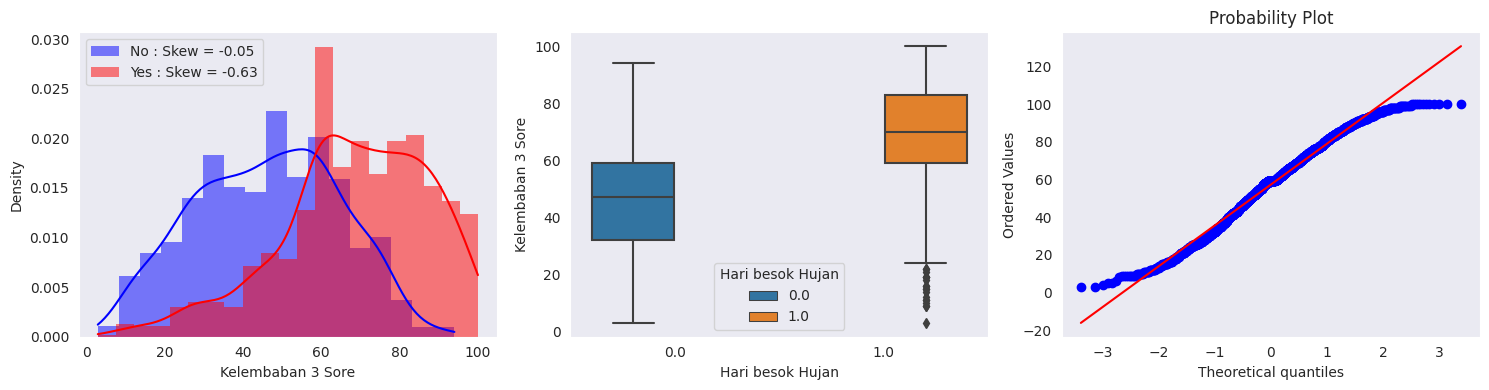

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


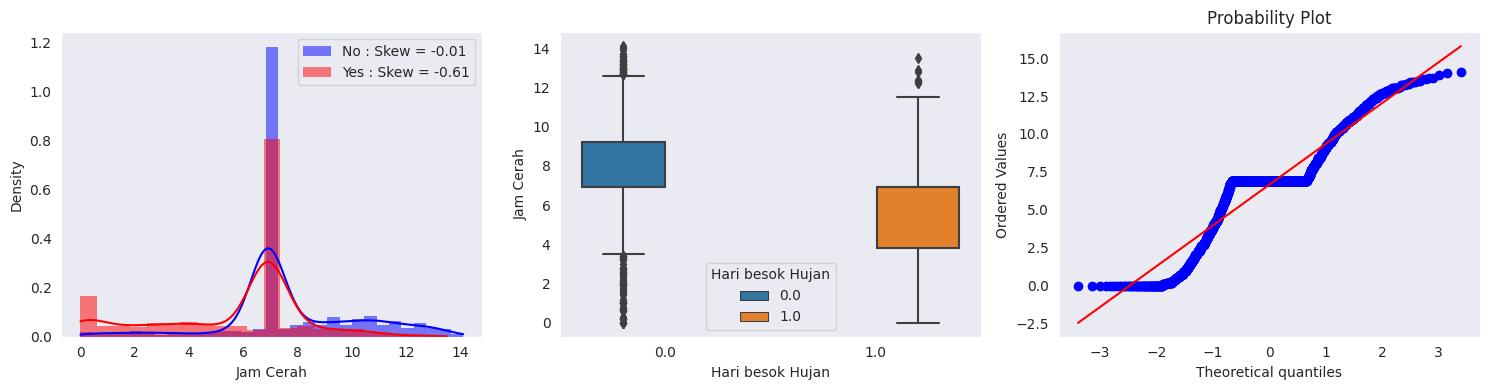

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


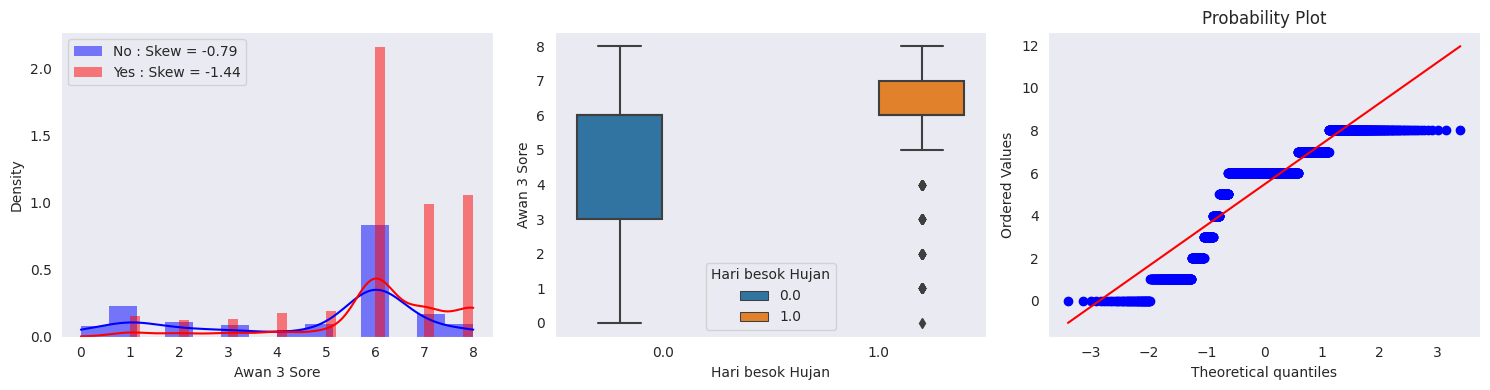

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


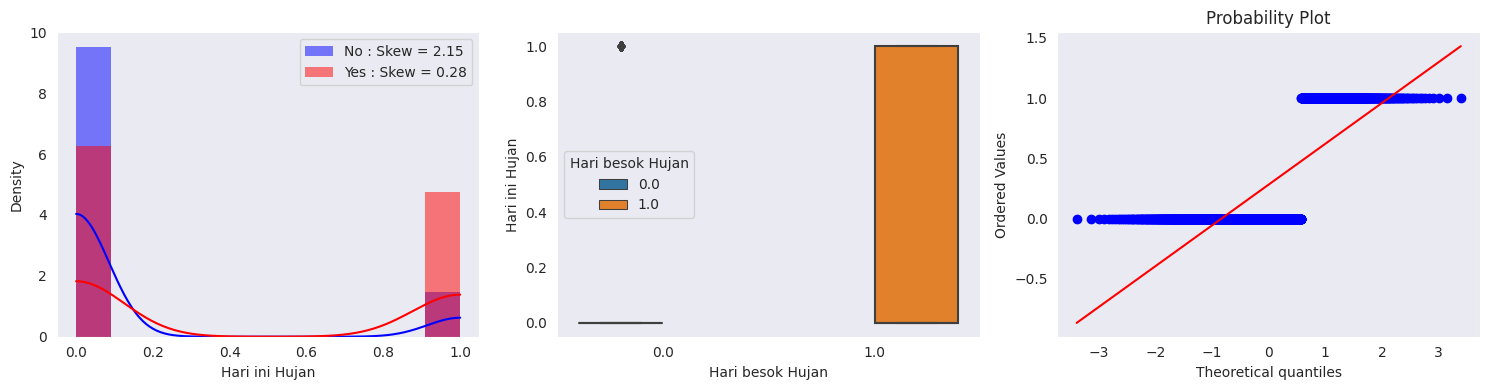

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


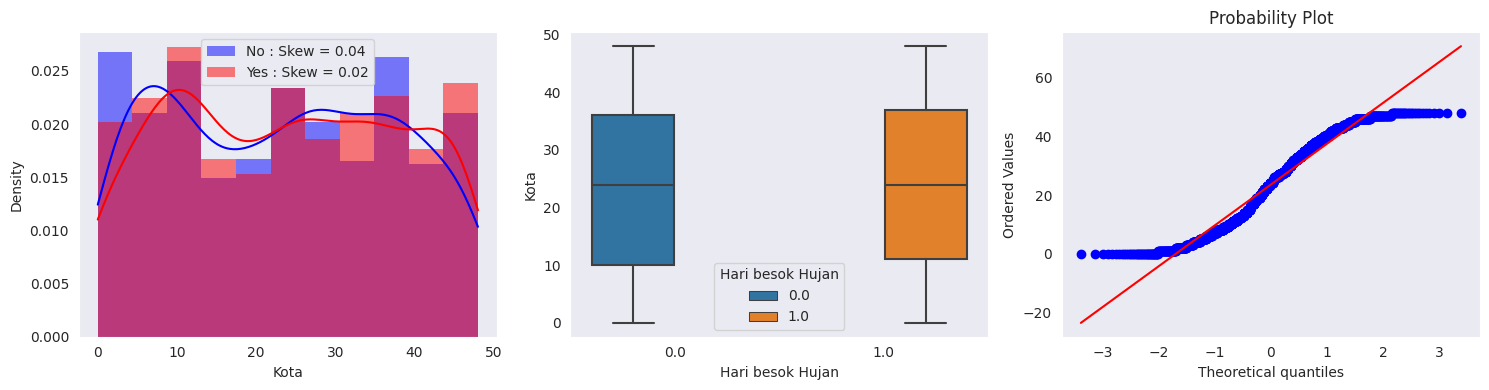

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


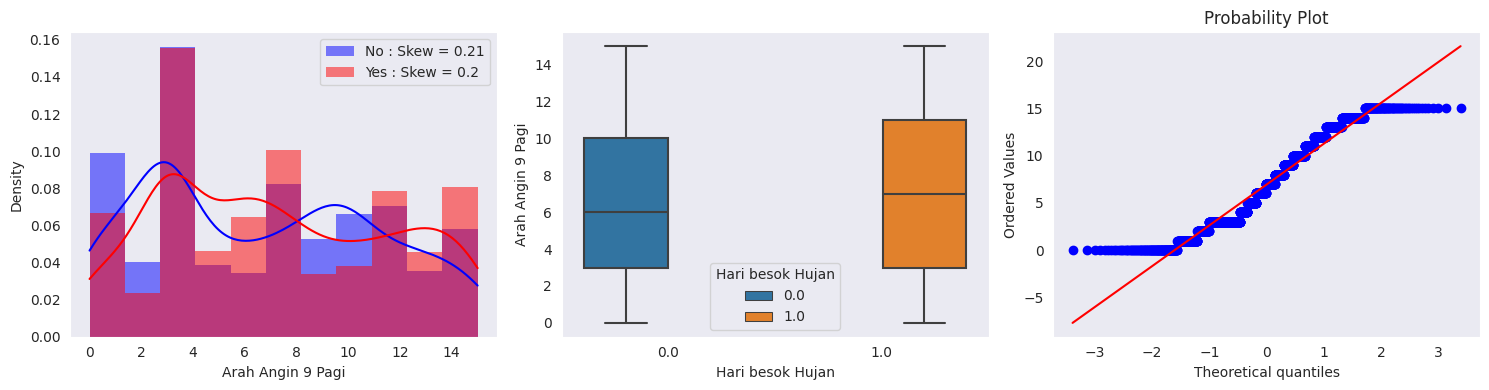

<ipython-input-153-48a5a32474f2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


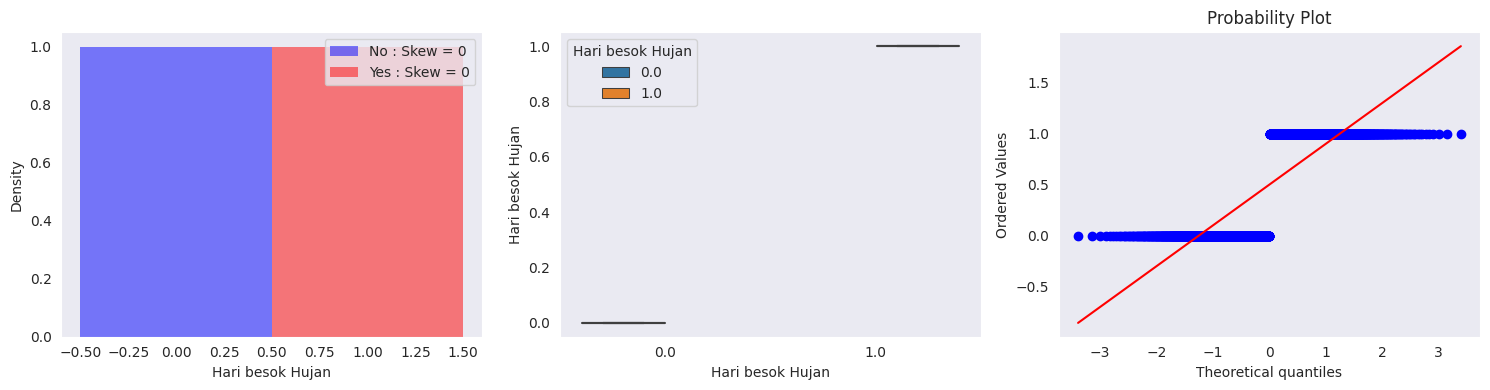

In [ ]:
visualize_data_distribution(df_1,df_1.columns.values)

## *One Hot Encoding Categorical Features*

In [ ]:
onehot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
onehot_encoder.fit(X_train[categorical_columns])

# Generate nama kolom untuk setiap kategorinya
encoded_cols = list(onehot_encoder.get_feature_names_out(categorical_columns))

# Transform into train and test
X_train_ohe = onehot_encoder.transform(X_train[categorical_columns])
X_test_ohe = onehot_encoder.transform(X_test[categorical_columns])

# Make dataframe for ohe results
X_train_cat = pd.DataFrame(data = X_train_ohe, columns = encoded_cols)
X_test_cat = pd.DataFrame(data = X_test_ohe, columns = encoded_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## *Concat Numerical and Categorical Features*

### Kolom Numerikal

In [ ]:
X_train_num = X_train[numerical_columns].reset_index(drop = True)
X_test_num = X_test[numerical_columns].reset_index(drop = True)

### *Concat*

In [ ]:
X_train = pd.concat([X_train_num,X_train_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)

# Reset index y_train dan y_test agar sama dengan X_train dan X_test
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

## *Features Scaling*

In [ ]:
# Define standardscaler scaler
standard_scaler = StandardScaler()

# Fit into training data
standard_scaler.fit(X_train)

# Transform into train and test data
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

## Dimensionality Reduction

### Menghitung PCA untuk *data train*

In [ ]:
# Instansiasi objek PCA
pca_ = PCA()

# Fit into training data
pca_.fit(X_train)

# Mencetak nilai eigen setiap principal component
print('Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_)
print("="*70)

# Mencetak ratio masing-masing nilai eigen terhadap keseluruhan
print('Rasio Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_ratio_)
print("="*70)

Nilai Eigen setiap Principal Component
[2.94044467e+00 1.66978467e+00 1.48203857e+00 1.41894453e+00
 1.36704518e+00 1.34519425e+00 1.30978453e+00 1.30694773e+00
 1.27037712e+00 1.25408569e+00 1.23645242e+00 1.21807249e+00
 1.21278811e+00 1.20146104e+00 1.18999878e+00 1.15915103e+00
 1.13619168e+00 1.10209227e+00 1.05888445e+00 1.02769363e+00
 1.02734738e+00 1.02705726e+00 1.02555967e+00 1.02492869e+00
 1.02431314e+00 1.02387913e+00 1.02348266e+00 1.02332239e+00
 1.02296860e+00 1.02289808e+00 1.02256265e+00 1.02226642e+00
 1.02196158e+00 1.02179341e+00 1.02127308e+00 1.02095694e+00
 1.02048556e+00 1.02033420e+00 1.01968971e+00 1.01956019e+00
 1.01869809e+00 1.01847008e+00 1.01817067e+00 1.01737553e+00
 1.01714868e+00 1.01487259e+00 1.01359902e+00 1.01212271e+00
 9.60912505e-01 9.44346220e-01 9.31462649e-01 9.10356152e-01
 8.93702931e-01 8.71837544e-01 8.64858557e-01 8.58968638e-01
 8.25430710e-01 8.15818597e-01 8.01933733e-01 7.73263536e-01
 7.52217197e-01 7.41555200e-01 6.69935831e-01 

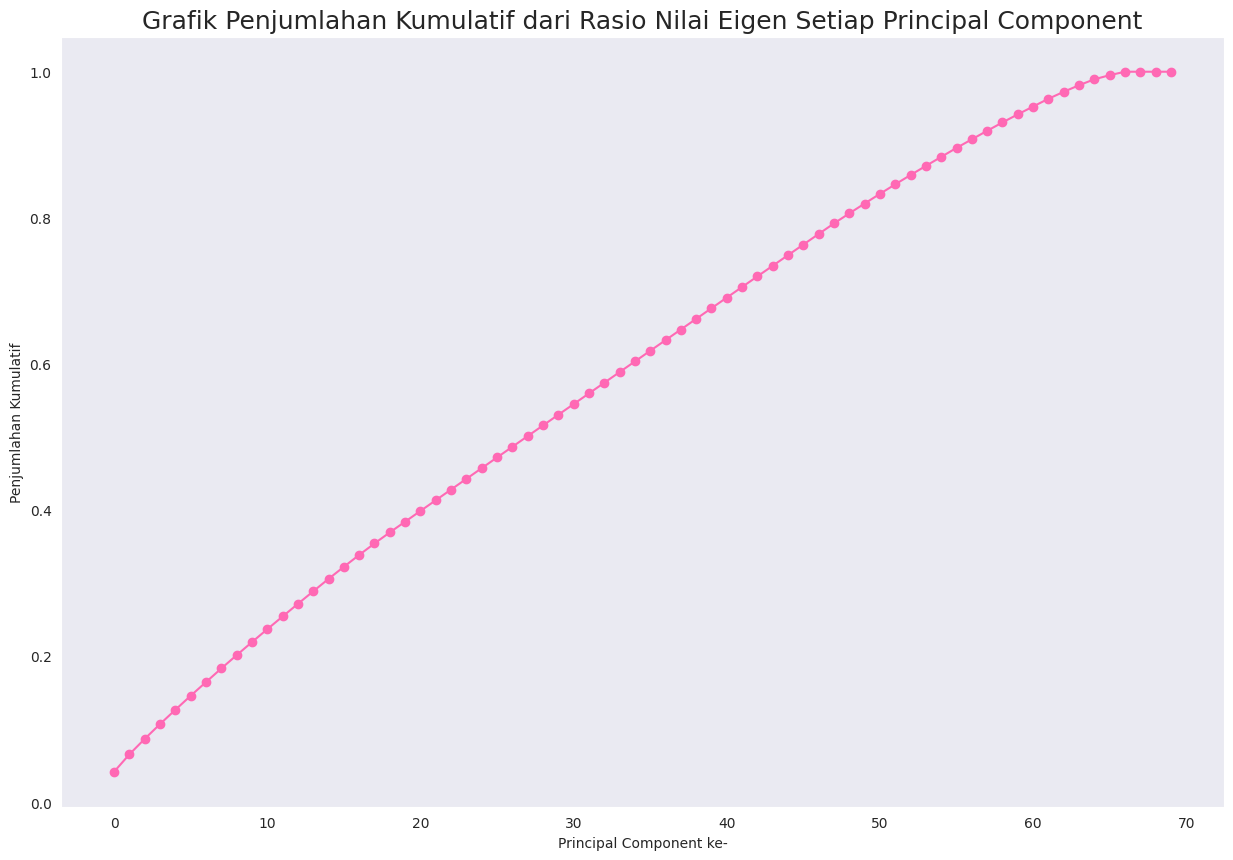

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(np.cumsum(pca_.explained_variance_ratio_), '-o', color = 'hotpink')
plt.title('Grafik Penjumlahan Kumulatif dari Rasio Nilai Eigen Setiap Principal Component', size = 18)
plt.xlabel("Principal Component ke-")
plt.ylabel('Penjumlahan Kumulatif')
plt.show()

Grafik ini menjelaskan berapa persen informasi yang bisa dijelaskan dari kumpulan beberapa *principal component*

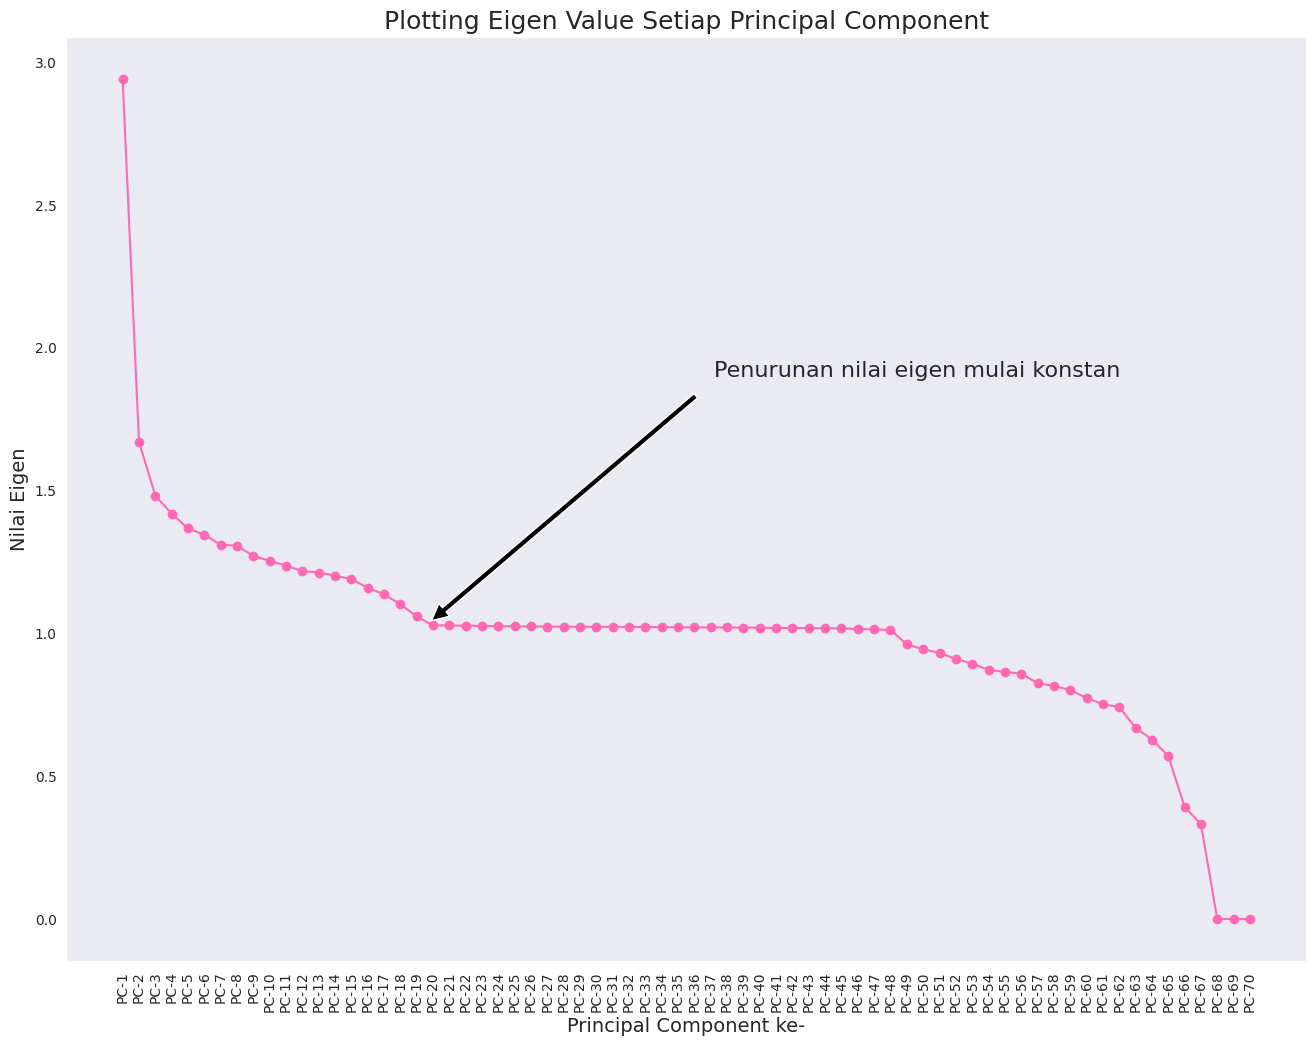

In [ ]:
n_component = len(pca_.explained_variance_)
plt.figure(figsize = (16,12))
pd.Series(pca_.explained_variance_).plot(kind = 'line', marker = 'o', color = 'hotpink')
plt.xticks(ticks = range(0,n_component), 
           labels = ['PC-'+str(i+1) for i in range(0, n_component)], 
           rotation = 90)
plt.xlabel('Principal Component ke-', size = 14)
plt.ylabel('Nilai Eigen', size = 14)
plt.title('Plotting Eigen Value Setiap Principal Component', size = 18)
plt.annotate('Penurunan nilai eigen mulai konstan',
            xy = (18, 1), xycoords = 'data',
            xytext = (0.85, 0.65), textcoords = 'axes fraction',
            arrowprops = dict(facecolor = 'black', shrink = 0.05),
            horizontalalignment = 'right', verticalalignment = 'top', size = 16)
plt.show()

Grafik ini bisa digunakan untuk menentukan jumlah *principal component* terbaik dengan cara melihat saat tidak terjadi penurunan nilai eigen yang signifikan (PC-18 sampai PC-48)

### Menentukan *n_best component* dengan *threshold* tertentu

In [ ]:
threshold_cumsum = 0.65
best_principal_component = 0
for pc_ke,cumsum in enumerate(np.cumsum(pca_.explained_variance_ratio_)):
    if cumsum >= threshold_cumsum:
        # Tambah 1 karna start index dari 0
        best_principal_component = pc_ke+1
        break

In [ ]:
best_principal_component

39

**ANALISIS**
Hasil menunjukkan terdapat **39** *principal component*, dimana dengan menggunakan jumlah itu kita dapat mempertahankan informasi dari data sebesar **+= 65%**

### *Fit and Transform PCA* dengan *best_component* yang didapat

In [ ]:
# Instansiasi objek PCA dengan jumlah komponen terbaik
pca_scaler_ = PCA(n_components = best_principal_component)

# Fit into training
pca_scaler_.fit(X_train)

# Transform into train and test
X_train_pca = pca_scaler_.transform(X_train)
X_test_pca = pca_scaler_.transform(X_test)

# *Modelling*

In [ ]:
# Inisialisasi fold dan scoring yang digunakan
num_fold = 10
scoring_accuracy = 'accuracy'
scoring_recall = 'recall'

## Buat *list* dari model yang akan digunakan

In [ ]:
# Buat list dari seluruh model yang digunakan
models = []

# Append model
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(probability = True)))

# K-fold cross validation initialization object
kfold = KFold(n_splits = num_fold, random_state = 42, shuffle = True)

Regresi logistik adalah salah satu metode dalam analisis statistik yang digunakan untuk memprediksi probabilitas kejadian suatu peristiwa yang tergantung pada satu atau lebih variabel independen. Metode ini biasanya digunakan ketika variabel dependen adalah variabel biner atau kategori dengan dua kemungkinan nilai, misalnya ya/tidak, sukses/gagal, atau 1/0.

Regresi logistik menggabungkan konsep regresi linier dengan fungsi logistik (atau sigmoid) untuk menghasilkan model yang dapat memperkirakan probabilitas suatu peristiwa terjadi. Model ini menggunakan variabel independen (misalnya umur, pendapatan, atau faktor lainnya) untuk memprediksi kemungkinan kejadian variabel dependen (misalnya, kemungkinan seseorang memiliki penyakit berdasarkan faktor risiko tertentu).

Support Vector Machine (SVM) adalah sebuah algoritma pembelajaran mesin yang digunakan untuk klasifikasi dan regresi. SVM merupakan metode pembelajaran yang didasarkan pada konsep margin maksimal. Tujuan dari SVM adalah untuk menemukan hyperplane (bidang pemisah) yang memiliki margin terbesar antara dua kelas data yang berbeda.

Berikut adalah penjelasan tentang Support Vector Machine:


1.   Konsep Hyperplane: Dalam SVM, hyperplane adalah bidang 
pemisah yang memisahkan dua kelas data. Pada SVM dengan kernel linear, hyperplane berupa garis lurus. Namun, SVM juga dapat menggunakan kernel lain yang memungkinkan hyperplane berupa kurva atau bahkan permukaan dalam dimensi yang lebih tinggi.
2.   Margin: Margin adalah jarak antara hyperplane dengan titik-titik terdekat dari kedua kelas data. Margin yang maksimal ditemukan dengan cara mencari hyperplane yang memaksimalkan jarak ini. SVM berfokus pada margin maksimal karena hyperplane dengan margin yang lebih besar cenderung memiliki kemampuan generalisasi yang lebih baik.
3. Support Vectors: Support vectors adalah subset dari data pelatihan yang berada tepat di sebelah hyperplane atau terletak di sekitar margin. Support vectors adalah titik-titik yang paling penting dalam SVM karena mereka mempengaruhi posisi dan orientasi hyperplane. SVM hanya menggunakan support vectors dalam pembentukan hyperplane, sehingga efisien dalam penggunaan memori dan komputasi.
4. Soft Margin: Dalam beberapa kasus, terdapat ketidaksempurnaan atau overlap antara kelas data. Dalam SVM, kita dapat menggunakan konsep "soft margin" yang memungkinkan beberapa titik data terletak di dalam margin atau bahkan salah kelas. Hal ini memungkinkan SVM untuk menyesuaikan klasifikasi yang lebih fleksibel. Parameter C digunakan untuk mengontrol trade-off antara margin maksimal dan jumlah kesalahan klasifikasi.
5. Kernel Trick: SVM juga memanfaatkan "kernel trick" untuk mengubah ruang fitur asli menjadi ruang fitur yang lebih tinggi atau bahkan tak terbatas. Hal ini memungkinkan SVM untuk menangani data yang tidak linear secara efisien. Beberapa kernel yang umum digunakan termasuk kernel linier, kernel polynomial, kernel Gaussian (RBF), dan kernel sigmoid.
Klasifikasi dan Regresi: Selain klasifikasi, SVM juga dapat digunakan untuk regresi dengan menggunakan metode Support Vector Regression (SVR). Dalam SVR, tujuannya adalah untuk mencari hyperplane yang memiliki margin terbesar di sekitar titik data target yang terletak dalam interval toleransi.
SVM adalah salah satu algoritma pembelajaran mesin yang populer karena kekuatan dan keampuhannya dalam menangani klasifikasi data. Dengan konsep margin maksimal dan kemampuan kernel trick, SVM mampu mengatasi masalah klasifikasi linier dan non-linier secara efisien.

## Fungsi untuk *K-fold cross validation* setiap model

In [ ]:
def perform_model(models, X_train, y_train, kfold, scoring = 'accuracy'):
    """
        Deskripsi Function:
        - Fungsi ini digunakan untuk melakukan model cross-validation dengan data latih yang ada. Setiap model
        akan divalidasi dengan ukuran skor (scoring) yang telah ditetapkan, semisal (akurasi, recall, etc).
        
        Function parameters:
        - models: list of tuples dari model yang ingin dituning (LogisticRegression, SVM, etc)
        - X_train: dataframe atau np.array dari atribut data latih yang sudah dipreprocessing
        - y_train: dataframe atau np.array dari target data latih yang sudah dipreprocessing
        - kfold: objek hasil instansiasi kelas KFold 
        - scoring: metode untuk memngukur performa model (accuracy, recall, precision, etc)
        
        Function returns:
        - cv_results: List dari hasil cross validation setiap model yang sudah dituning
        - model_names: List dari nama setiap model (string)
        - print_msg: List berupa pesan untuk menampilkan model dengan hasil performanya pada data validasi
    """
    cv_results = [] # Menampung hasil crossvalidation setiap model
    model_names = [] # Menampung nama model
    print_msg = [] # Menampung pesan yang akan ditampilkan
    
    
    for model_name, model in models:
        # Cross validation result
        cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)

        # Append into list
        cv_results.append(cv_result)
        model_names.append(model_name)

        # Print result
        msg_result = "{}: mean {} = {}  std {} = {}".format(model_name, scoring, cv_result.mean(), scoring, cv_result.std())
        print_msg.append(msg_result)
    
    return cv_results, model_names, print_msg

## *Tuning model* dengan *scoring "accuracy"*

In [ ]:
cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models = models,
    X_train = X_train_pca,
    y_train = y_train,
    kfold = kfold,
    scoring = scoring_accuracy
)

In [ ]:
# Cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.7310000000000001  std accuracy = 0.04115823125451336
Support Vector Machine: mean accuracy = 0.7204999999999999  std accuracy = 0.030696090956341644


### Membandingkan hasil akurasi setiap model

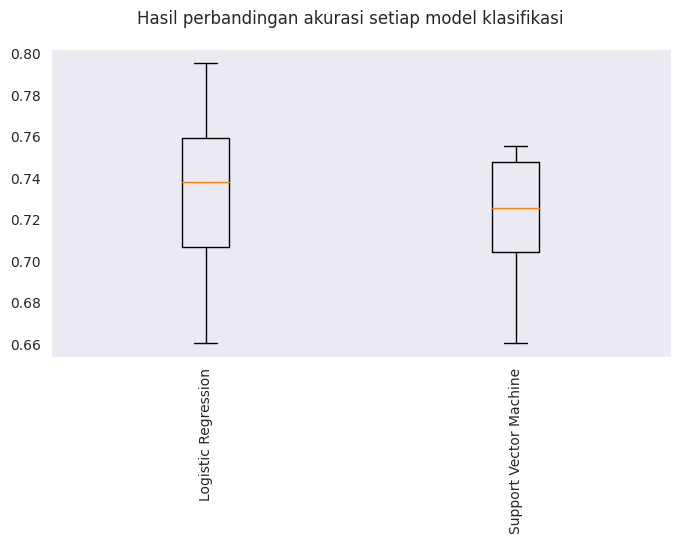

In [ ]:
fig = plt.figure(figsize = (10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy, meanline = True)
ax.set_xticklabels(model_names, rotation = 90)
fig.set_size_inches(8,4)
plt.show()

**ANALISIS:**
1. Nilai median dari Logistic Regression lebih besar dibandingkan dengan Support Vector Machine
2. Dapat dilihat juga bahwa upper fence dan lower fence logistic regression juga lebih tinggi jika dibandingkan dengan SVM
3. 

### *Classification report untuk* masing-masing model
***
Ukuran performa yang digunakan pada permasalahan ini adalah memaksimalkan **recall**

In [ ]:
def print_classification_report(y_train, y_test, y_pred_train, y_pred_test, model_name):
    # Print score
    print('AKURASI')
    print("Training Accuracy score {}  = {}%".format(model_name,(metrics.accuracy_score(y_train,y_pred_train))*100))
    print("Testing Accuracy score {}  = {}%".format(model_name,(metrics.accuracy_score(y_test,y_pred_test))*100))
    print()
    print("RECALL")
    print("Training Recall score {}  = {}%".format(model_name,(metrics.recall_score(y_train,y_pred_train))*100))
    print("Testing Recall score {}  = {}%".format(model_name,(metrics.recall_score(y_test,y_pred_test))*100))
    print("="*100)
    print("Confusion Matrix of {} on Training".format(model_name))
    print(metrics.confusion_matrix(y_train,y_pred_train))
    print("Confusion Matrix of {} on Testing".format(model_name))
    print(metrics.confusion_matrix(y_test,y_pred_test))
    print("="*100)
    # Hasil klasifikasi
    print("Detailed Classification Report of {} on Training".format(model_name))
    print(metrics.classification_report(y_train,y_pred_train))
    print("Detailed Classification Report of {} on Testing".format(model_name))
    print(metrics.classification_report(y_test,y_pred_test))

In [ ]:
def predict_proba(y_true, y_probability, thresholds=[round(i,2) for i in np.arange(0,1,0.1)], scoring = 'recall'):
    thresholds_predict = {}
    thresholds_results = {}
    for threshold in thresholds:
        thresholds_predict[threshold] = []
        for y_prob in y_probability:
            if y_prob[0] >= threshold:
                thresholds_predict[threshold].append(0)
            else:
                thresholds_predict[threshold].append(1)
        y_prediction = np.array(thresholds_predict[threshold])
        if scoring == 'accuracy':
            thresholds_results[threshold] = metrics.accuracy_score(y_true,y_prediction)*100
        elif scoring == "recall":
            thresholds_results[threshold] = metrics.recall_score(y_true, y_prediction)*100
    return thresholds_predict, thresholds_results

**SVM**

In [ ]:
# Inisialisasi model
svm_balanced = SVC(probability = True)
# Fit model into training data
svm_balanced.fit(X_train_pca, y_train)
# Get y prediction
y_pred_train_svm_balanced = svm_balanced.predict(X_train_pca)
y_pred_test_svm_balanced = svm_balanced.predict(X_test_pca)

In [ ]:
print_classification_report(y_train, y_test, y_pred_train_svm_balanced, y_pred_test_svm_balanced, 'SVM')

AKURASI
Training Accuracy score SVM  = 79.2%
Testing Accuracy score SVM  = 72.93590885648648%

RECALL
Training Recall score SVM  = 77.2%
Testing Recall score SVM  = 71.5884136777162%
Confusion Matrix of SVM on Training
[[812 188]
 [228 772]]
Confusion Matrix of SVM on Testing
[[24267  8828]
 [ 2717  6846]]
Detailed Classification Report of SVM on Training
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      1000
         1.0       0.80      0.77      0.79      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000

Detailed Classification Report of SVM on Testing
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.81     33095
         1.0       0.44      0.72      0.54      9563

    accuracy                           0.73     42658
   macro avg       0.67      0.72      0.68     

**ANALISIS SVM:**
1. Dengan parameter *default*, SVM yang sudah di-*training* dengan 1000 *sub*-sampel *data training* menunjukkan adanya penurunan nilai akurasi dan *recall* dari *data training* ke data uji. Dengan kata lain terjadi *overfitting*. Hal ini dikarenakan jumlah *principal component (feature)* yang digunakan masih terbilang cukup banyak.
2. Model SVM juga tidak bisa mengeneralisasi *data training* yang mengakibatkan performa data ujinya kurang baik. *Precesion* untuk kelas (1 : "yes") pada *confusion matrix data testing* terbilang cukup rendah. Namun *recall* untuk kedua kelas pada data uji terbilang cukup baik yang berada di kisaran **70%**.
3. Sampel *dataset* awal berjumlah 145.000 baris, sedangkan pada pelatihan dengan SVM digunakan *sub*-sampel yag 145x lebih sedikit dibandingkan jumlah sampel awalnya. Hal ini bisa menyebabkan model kurang belajar terhadap *data training* yang ada. Pengambilan *sub*-sampel tersebut juga dilakukan secara acak tanpa memperhatikan karakteristik setiap fitur dalam mebedakan kelas.
4. Penurunan akurasi dari pelatihan *data training* dan pengujian data uji adalah (79.2%-72.9%) = **6,3%**
5. Penurunan *recall* dari pelatihan *data training* dan pengujian data uji adalah (77,2%-71.6%) = **5,6%**

**LogReg**

In [ ]:
# Inisialisasi model
logreg_balanced = LogisticRegression()
# Fit model into training data
logreg_balanced.fit(X_train_pca, y_train)
# Get y prediction
y_pred_train_logreg_balanced = logreg_balanced.predict(X_train_pca)
y_pred_test_logreg_balanced = logreg_balanced.predict(X_test_pca)

In [ ]:
print_classification_report(y_train, y_test, y_pred_train_logreg_balanced, y_pred_test_logreg_balanced, 'Logistic Regression')

AKURASI
Training Accuracy score Logistic Regression  = 75.05%
Testing Accuracy score Logistic Regression  = 72.27014862393924%

RECALL
Training Recall score Logistic Regression  = 75.1%
Testing Recall score Logistic Regression  = 73.66935062218968%
Confusion Matrix of Logistic Regression on Training
[[750 250]
 [249 751]]
Confusion Matrix of Logistic Regression on Testing
[[23784  9311]
 [ 2518  7045]]
Detailed Classification Report of Logistic Regression on Training
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75      1000
         1.0       0.75      0.75      0.75      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

Detailed Classification Report of Logistic Regression on Testing
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80     33095
         1.0       0.43    

**ANALISIS LOGREG:**
**ANALISIS SVM:**
1. Dengan parameter *default*, LogReg yang sudah di-*training* dengan 1000 *sub*-sampel *data training* menunjukkan adanya penurunan nilai akurasi dan *recall* dari *data training* ke data uji. Dengan kata lain terjadi *overfitting*. Hal ini dikarenakan jumlah *principal component (feature)* yang digunakan masih terbilang cukup banyak.
2. Model LogReg juga tidak bisa mengeneralisasi *data training* yang mengakibatkan performa data ujinya kurang baik. *Precesion* untuk kelas (1 : "yes") pada *confusion matrix data testing* terbilang cukup rendah. Namun *recall* untuk kedua kelas pada data uji terbilang cukup baik yang berada di kisaran **70%**.
3. Sampel *dataset* awal berjumlah 145.000 baris, sedangkan pada pelatihan dengan LogReg digunakan *sub*-sampel yag 145x lebih sedikit dibandingkan jumlah sampel awalnya. Hal ini bisa menyebabkan model kurang belajar terhadap *data training* yang ada. Pengambilan *sub*-sampel tersebut juga dilakukan secara acak tanpa memperhatikan karakteristik setiap fitur dalam mebedakan kelas.
4. Penurunan akurasi dari pelatihan *Data training* dan pengujian data uji adalah (75.05%-72.27%) = **2,78%**
5. Penurunan *recall* dari pelatihan *data training* dan pengujian data uji adalah (75.1%-73.67%) = **1,43%**

**ANALISIS TERHADAP KEDUA MODEL (SVM & LOGREG):**
1. Apabila kedua model dibandingkan, maka LogReg dikatakan relatif lebih baik dibandingkan dengan SVM karena penurunan kinerja dari *training* ke *testing* tidak lebih besar dibandingkan penurunan yang serupa pada SVM.
2. Penurunan akurasi LogReg hanya sebesar **2,78%** sedangkan SVM sebesar **6,3%**
3. Penurunan *recall* LogReg hanya sebesar **1,43%** sedangkan SVM sebesar **5,6%**

## *Tuning model* dengan *hyperparameter tuning*

###  *Hyperparameter Logistic Regression Model*

In [ ]:
# Inisialisasi LogReg Model
logreg_params_tuned_model = LogisticRegression()

# Inisialisasi objek K-Fold dengan k = 10
kfold = kfold

# Inisialisasi daftar hyperparameter yang akan dituning
logreg_params_grid = {
    'C':[0.01,0.1,1],
    'tol':[0.1,0.01,0.001],
    'solver':['lbfgs', 'liblinear', 'sag', 'saga','newton-cg'],
}

# Instansiasi grid seach objek
grid_params_logreg = GridSearchCV(
    estimator = logreg_params_tuned_model,
    param_grid = logreg_params_grid,
    scoring = scoring_recall,
    cv = kfold
)

# Fit grid objek ke data train
grid_results_logreg_ = grid_params_logreg.fit(X_train_pca,y_train)

In [ ]:
# Cetak hyperparameter yang memberikan hasil terbaik
print('Best Logistic Regression Hyperparameter: {}'.format(grid_results_logreg_.best_params_))
print('Best Logistic Regression Recall Score: {}'.format(grid_results_logreg_.best_score_*100),"%")

Best Logistic Regression Hyperparameter: {'C': 0.01, 'solver': 'sag', 'tol': 0.1}
Best Logistic Regression Recall Score: 73.21604263098214 %


### *Hyperparameter SVM Model*

In [ ]:
# Inisialisasi SVM model
svm_params_tuned_model = SVC()

# Inisialisasi objek K-Fold dengan k = 10
kfold = kfold

# Inisialisasi daftar hyperparameter yang akan dituning
params_grid = {
    'C':[0.01,0.1,1],
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma':['scale','auto'],
}

# Instansiasi grid seach objek
grid_params_svm = GridSearchCV(
    estimator = svm_params_tuned_model,
    param_grid = params_grid,
    scoring = scoring_recall,
    cv = kfold
)

# Fit grid objek ke data train
grid_results_svm_ = grid_params_svm.fit(X_train_pca,y_train)

In [ ]:
# Cetak hyperparameter yang memberikan hasil terbaik
print('Best SVM Hyperparameter: {}'.format(grid_results_svm_.best_params_))
print('Best SVM Recall Score: {}'.format(grid_results_svm_.best_score_*100),"%")

Best SVM Hyperparameter: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
Best SVM Recall Score: 79.79795918367347 %


**ANALISIS *Hyperparameter Tuning* LogReg dan SVM:**
1. Rata-rata *recall* LogReg sebesar 73.21604263098214% dengan pengaturan parameter {'C': 0.1, 'solver': 'sag', 'tol': 0.1}
2. Rata-rata *recall* SVM sebesar 79.79795918367347% dengan pengaturan parameter {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
3. Sementara, model SVM memberikan performa *recall* yang lebih baik dibandingkan dengan LogReg, akan tetapi akan dilihat bagaimana elemen *confusion matrix* disetiap model dengan pengaturan parameter yang optimal dari kedua metode tersebut.

# Evaluasi dan Finalisasi Model
- - -
Model yang sudah dilatih akan dievaluasi dengan *data testing* (30%) dengan parameter optimal yang sudah di-*tuning*

## *Logistic Regression*

In [ ]:
# Inisialisasi model LR dengan hyperparameter terbaik hasil tuning
logreg_final = LogisticRegression(
    C = grid_results_logreg_.best_params_['C'],
    tol = grid_results_logreg_.best_params_['tol'],
    solver = grid_results_logreg_.best_params_['solver'],
)

# Fit model into training data
logreg_final.fit(X_train_pca, y_train)

# Get y prediction
y_pred_train_logreg = logreg_final.predict(X_train_pca)
y_pred_test_logreg = logreg_final.predict(X_test_pca)

# Get X_test probability
y_prob_test_logreg = logreg_final.predict_proba(X_test_pca)

### Cetak hasil klasifikasi hasil *tuning hyperparameter* LogReg

In [ ]:
print_classification_report(y_train, y_test, y_pred_train_logreg, y_pred_test_logreg, 'Logistic Regression')

AKURASI
Training Accuracy score Logistic Regression  = 74.85000000000001%
Testing Accuracy score Logistic Regression  = 73.71419194523887%

RECALL
Training Recall score Logistic Regression  = 72.6%
Testing Recall score Logistic Regression  = 71.51521489072466%
Confusion Matrix of Logistic Regression on Training
[[771 229]
 [274 726]]
Confusion Matrix of Logistic Regression on Testing
[[24606  8489]
 [ 2724  6839]]
Detailed Classification Report of Logistic Regression on Training
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75      1000
         1.0       0.76      0.73      0.74      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

Detailed Classification Report of Logistic Regression on Testing
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81     33095
         1.0   

**ANALISIS Evaluasi Model LogReg dengan Parameter Optimal:**

1. Parameter optimal ['C': 0.1, 'solver': 'liblinear', 'tol': 0.1]
2. Masih terjadi *overfitting*
3. Penurunan akurasi dari 74.85% menjadi 73.71% sebesar **1,14%**
4. Penurunan *recall* dari 72.6% menjadi 71.51% sebesar **1,09%**
5. Walaupun *recall* cukup baik (kisaran 70%), LogReg masih memberikan *precision* yang rendah untuk kelas 1 ("yes") pada *data testing*

### Cetak hasil klasifikasi berdasarkan *threshold* (LogReg)

In [ ]:
logreg_threshold_predict_, logreg_threshold_results_ = predict_proba(y_test, y_prob_test_logreg)
df_logreg_threshold_predict_ = pd.DataFrame(data = logreg_threshold_predict_)


for threshold in [round(i,2) for i in np.arange(0,1,0.1)]:
    print('THRESHOLD ',threshold)
    y_pred = np.array(df_logreg_threshold_predict_[threshold])
    print(metrics.classification_report(y_test, y_pred, labels = np.unique(y_pred)))

THRESHOLD  0.0
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     33095

   micro avg       0.78      1.00      0.87     33095
   macro avg       0.78      1.00      0.87     33095
weighted avg       0.78      1.00      0.87     33095

THRESHOLD  0.1
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     33095
           1       0.82      0.06      0.12      9563

    accuracy                           0.79     42658
   macro avg       0.81      0.53      0.50     42658
weighted avg       0.79      0.79      0.71     42658

THRESHOLD  0.2
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     33095
           1       0.69      0.26      0.38      9563

    accuracy                           0.81     42658
   macro avg       0.76      0.61      0.63     42658
weighted avg       0.79      0.81      0.77     42658

THRESHOLD  0.3
             

## SVM

In [ ]:
# Inisialisasi model SVM dengan hyperparameter terbaik hasil tuning
svm_final = SVC(
    C = grid_results_svm_.best_params_['C'],
    kernel = grid_results_svm_.best_params_['kernel'],
    gamma = grid_results_svm_.best_params_['gamma'],
    probability = True
)

# Fit model into training data
svm_final.fit(X_train_pca,y_train)

# Get y prediction
y_pred_train_svm = svm_final.predict(X_train_pca)
y_pred_test_svm = svm_final.predict(X_test_pca)

# Get X_test probability
y_prob_test_svm = svm_final.predict_proba(X_test_pca)

In [ ]:
print_classification_report(y_train, y_test, y_pred_train_svm, y_pred_test_svm,'SVM')

AKURASI
Training Accuracy score SVM  = 50.5%
Testing Accuracy score SVM  = 23.369590698110553%

RECALL
Training Recall score SVM  = 99.8%
Testing Recall score SVM  = 99.69674788246367%
Confusion Matrix of SVM on Training
[[ 12 988]
 [  2 998]]
Confusion Matrix of SVM on Testing
[[  435 32660]
 [   29  9534]]
Detailed Classification Report of SVM on Training
              precision    recall  f1-score   support

         0.0       0.86      0.01      0.02      1000
         1.0       0.50      1.00      0.67      1000

    accuracy                           0.51      2000
   macro avg       0.68      0.51      0.35      2000
weighted avg       0.68      0.51      0.35      2000

Detailed Classification Report of SVM on Testing
              precision    recall  f1-score   support

         0.0       0.94      0.01      0.03     33095
         1.0       0.23      1.00      0.37      9563

    accuracy                           0.23     42658
   macro avg       0.58      0.51      0.20   

**ANALISIS Evaluasi Model SVM dengan Parameter Optimal:** <br>
1. Parameter optimal ['C': 0.01, 'gamma': 'scale', 'kernel': 'poly']
2. Masih terjadi *overfitting*
3. Penurunan akurasi dari 50.5% menjadi 23.37% sebesar **27,13%**
4. Penurunan *recall* dari 99.8% menjadi 99.69% sebesar **0,11%**
5. SVM dapat memaksimalkan *recall* untuk kelas 1 tapi tidak dengan kelas 0. Hal ini terlihat dari nilai *recall* sempurna untuk kelas 1 dan nilai *recall* yang sangat rendah (nyaris 0) pada kelas 0
6. Walaupun rata-rata *recall* yang diberikan cukup tinggi (99,06%) tapi hal ini tidak bagus apabila dilihat dari *confusion matrix data testing* yang diberikannya
7. Akurasi yang diberikan SVM juga terbilang cukup rendah untuk *data training* dan *data testing*

In [ ]:
svm_threshold_predict_, svm_threshold_results_ = predict_proba(y_test, y_prob_test_svm)
df_svm_threshold_predict_ = pd.DataFrame(data = svm_threshold_predict_)


for threshold in [round(i,2) for i in np.arange(0,1,0.1)]:
    print('THRESHOLD ',threshold)
    y_pred = np.array(df_svm_threshold_predict_[threshold])
    print(metrics.classification_report(y_test, y_pred, labels = np.unique(y_pred)))

THRESHOLD  0.0
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     33095

   micro avg       0.78      1.00      0.87     33095
   macro avg       0.78      1.00      0.87     33095
weighted avg       0.78      1.00      0.87     33095

THRESHOLD  0.1
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     33095

   micro avg       0.78      1.00      0.87     33095
   macro avg       0.78      1.00      0.87     33095
weighted avg       0.78      1.00      0.87     33095

THRESHOLD  0.2
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     33095

   micro avg       0.78      1.00      0.87     33095
   macro avg       0.78      1.00      0.87     33095
weighted avg       0.78      1.00      0.87     33095

THRESHOLD  0.3
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     33095

   micro av

# Pengambilan Keputusan

1. Melihat performa SVM saat dievaluasi dengan parameter optimalnya, SVM relatif tidak lebih baik dibandingkan dengan Logreg. Oleh karena itu, model yang akan dikembangkan adalah **model LogReg**
2. Untuk 1000 subsampel *data training* yang digunakan dari 145.000-an sampel dataset, SVM relatif tidak bisa mengeneralisasi *data training* yang mengakibatkan performanya pada *data testing* yang terbilang rendah. Berbanding terbalik dengan LogReg yang cukup bisa mengeneralisasi *data training* yang mengakibatkan performarnya pada *data testing* yang cukup baik (berada di kisaran 70%) untuk kedua kelas.
3. Setelah di-*tuning hyperparameter*, kedua model sama-sama tidak bisa memberikan nilai *precision* yang baik untuk kelas 1 pada *data testing*

#Model Inference

In [ ]:
# Convert X_train, y_train, X_test, and y_test to DataFrames
df_X_train = pd.DataFrame(X_train_pca)
df_y_train = pd.DataFrame(y_train)
df_X_test = pd.DataFrame(X_test_pca)
df_y_test = pd.DataFrame(y_test)

# Concatenate X_train and X_test vertically
merged_X = pd.concat([df_X_train, df_X_test], axis=0)

# Concatenate y_train and y_test vertically
merged_y = pd.concat([df_y_train, df_y_test], axis=0)

# Concatenate merged_X and merged_y horizontally
X_to_test = pd.concat([merged_X, merged_y], axis=1)


In [ ]:
X_to_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44658 entries, 0 to 42657
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   0                 44658 non-null  float64
 1   1                 44658 non-null  float64
 2   2                 44658 non-null  float64
 3   3                 44658 non-null  float64
 4   4                 44658 non-null  float64
 5   5                 44658 non-null  float64
 6   6                 44658 non-null  float64
 7   7                 44658 non-null  float64
 8   8                 44658 non-null  float64
 9   9                 44658 non-null  float64
 10  10                44658 non-null  float64
 11  11                44658 non-null  float64
 12  12                44658 non-null  float64
 13  13                44658 non-null  float64
 14  14                44658 non-null  float64
 15  15                44658 non-null  float64
 16  16                44658 non-null  float6

In [ ]:
to_inference = X_to_test[18:20]
to_inference

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,Hari besok Hujan
18,-0.228093,-1.628056,-1.497477,-1.511092,-2.102461,-1.879126,-0.888213,0.703597,0.878444,-0.140312,...,0.796905,3.219767,-3.507226,-0.507381,1.140238,0.427081,-0.759229,1.331463,0.086252,0.0
19,2.969469,0.418221,-0.838645,-0.901415,-1.298690,-1.095947,-0.066871,-0.677409,-1.880782,-0.681234,...,-0.142062,2.248308,-0.823873,-3.201891,4.443246,1.766748,1.081875,1.291461,4.306811,0.0


In [ ]:
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [ ]:
X_to_test

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,Hari besok Hujan
0,0.138679,-0.937589,-0.846124,1.783636,-2.303056,3.214219,-3.317780,1.893625,-1.251027,-0.937254,...,0.141108,0.097952,-0.106399,-0.374994,-0.157414,-0.192433,-0.511647,-0.023400,0.071675,0.0
1,1.235292,1.930037,2.415258,-0.848063,-0.781333,-0.520375,-0.015326,-0.230303,-0.925850,-0.047801,...,-0.193645,0.771377,0.350829,0.268371,0.277127,0.096327,1.417853,-0.359742,-0.216163,1.0
2,-0.471891,-0.838772,0.023482,-0.908901,-1.873703,-0.971440,0.816315,-0.544685,2.370909,0.206973,...,0.275907,-0.154026,1.292447,0.531608,0.930920,-0.850747,0.332695,-0.566798,-1.389489,0.0
3,-2.822425,0.876268,-1.472746,-0.666351,0.425096,-1.444670,1.785471,2.338620,-0.951117,1.578282,...,-0.467716,0.027293,0.817729,0.115705,-0.138975,0.340286,-0.076677,1.192115,0.753700,1.0
4,4.029385,2.492714,-1.211020,2.074339,-0.486200,0.807979,0.980880,-1.584666,3.034046,0.607640,...,-0.474765,0.551841,-0.135998,-0.745398,-0.473454,0.626019,0.873885,1.577770,-1.234481,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44655,-2.423804,-0.034034,-0.019723,1.853694,0.042176,-0.705390,0.494241,-1.393911,1.246184,0.268114,...,-0.443389,0.528480,-0.119947,-0.731134,-0.405265,0.736873,0.479591,1.445488,-1.171123,1.0
44656,3.541830,0.895065,-0.701365,1.828454,-1.077714,-0.240795,-0.593723,0.866272,1.759403,-0.474158,...,0.073982,0.644721,3.686223,1.215627,0.991854,-0.240256,-0.575514,-0.569905,3.288347,0.0
44657,-1.891098,0.614043,-1.160721,0.317989,-2.053690,-2.581265,-1.018748,-0.746308,-0.758244,-1.173999,...,-1.857346,-1.321866,-0.668484,-2.148169,-0.266995,-0.410751,-0.547210,-1.404382,0.834122,1.0
44658,-0.228093,-1.628056,-1.497477,-1.511092,-2.102461,-1.879126,-0.888213,0.703597,0.878444,-0.140312,...,0.796905,3.219767,-3.507226,-0.507381,1.140238,0.427081,-0.759229,1.331463,0.086252,0.0


In [ ]:
X_to_test = X_to_test[-2:]
X_to_test

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,Hari besok Hujan
44658,-0.228093,-1.628056,-1.497477,-1.511092,-2.102461,-1.879126,-0.888213,0.703597,0.878444,-0.140312,...,0.796905,3.219767,-3.507226,-0.507381,1.140238,0.427081,-0.759229,1.331463,0.086252,0.0
44659,2.969469,0.418221,-0.838645,-0.901415,-1.298690,-1.095947,-0.066871,-0.677409,-1.880782,-0.681234,...,-0.142062,2.248308,-0.823873,-3.201891,4.443246,1.766748,1.081875,1.291461,4.306811,0.0


In [ ]:
X_to_test = X_to_test.drop(columns = 'Hari besok Hujan')

In [ ]:
Hari_besok_Hujan = logreg_final.predict(X_to_test)

# Analisis Kegiatan

Berdasarkan kegiatan yang telah dilakukan, masih perlu ditingkatkan dari segi teknik-teknik *preprocessing* yang digunakan agar bisa meningkatkan performa model. Seperti *gridsearch* untuk seleksi fitur serta teknik untuk menentukan *principal component* terbaik untuk bisa mengurangi terjadinya *overfitting*. Selain itu, *outliers* yang ada pada *sub*-sampel *data training* yang digunakan untuk melatih model, bisa dilakukan penanganan terlebih dahulu sebelum digunakan, seperti menggunakan metode *trimming*, *winsorizing* dan sebagainya. Kami belum bisa menerapkan hal-hal tersebut karena keterbatasan waktu pengerjaan *final project*.